In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from scipy.stats import chi2_contingency
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import norm, probplot
import warnings

In [37]:
warnings.filterwarnings('ignore')

In [38]:
file_path = "Dacon 데이터/dacon_kpi/"

In [39]:
customer = pd.read_csv(file_path + 'customers.csv')
location = pd.read_csv(file_path + 'locations.csv')
order_items = pd.read_csv(file_path + 'order_items.csv')
order = pd.read_csv(file_path + 'orders.csv')
payment = pd.read_csv(file_path + 'payments.csv')
product = pd.read_csv(file_path + 'products.csv')
review = pd.read_csv(file_path + 'reviews.csv')
seller = pd.read_csv(file_path + 'sellers.csv')

# 데이터 탐색

### customer

고객과 관련된 정보  
- Customer_id : 고객 ID  
- Customer_unique_id : 고객 고유 ID  
- Customer_zipcode_prefix : 고객 우편번호 앞부분  
- Customer_city : 고객 도시  
- Customer_state : 고객 주  

In [40]:
customer.head()

,Customer_id,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state
0,CUSTOMER_00000,CUSTOMER_Unique_00000,14409,franca,SP
1,CUSTOMER_00001,CUSTOMER_Unique_00001,9790,sao bernardo do campo,SP
2,CUSTOMER_00002,CUSTOMER_Unique_00002,1151,sao paulo,SP
3,CUSTOMER_00003,CUSTOMER_Unique_00003,8775,mogi das cruzes,SP
4,CUSTOMER_00004,CUSTOMER_Unique_00004,89254,jaragua do sul,SC


In [41]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87955 entries, 0 to 87954
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Customer_id              87955 non-null  object
 1   Customer_unique_id       87955 non-null  object
 2   Customer_zipcode_prefix  87955 non-null  int64 
 3   Customer_city            87955 non-null  object
 4   Customer_state           87955 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


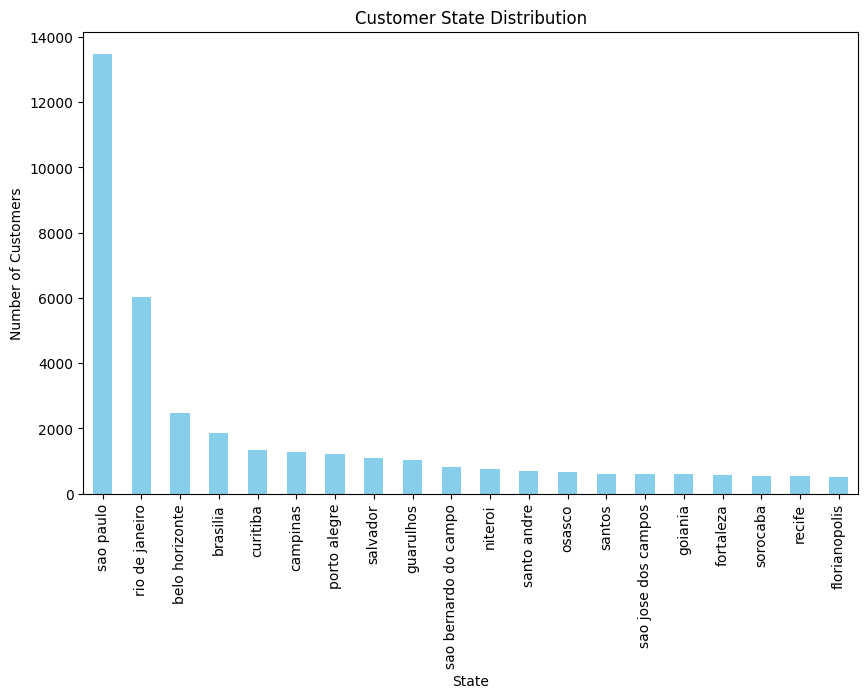

In [42]:
# 고객 수 상위 20개 도시
# Customer_state 컬럼의 값의 빈도를 계산
state_counts = customer['Customer_city'].value_counts().head(20)
# 막대 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
state_counts.plot(kind='bar', color='skyblue')  # 막대 그래프 그리기

# 그래프 제목 및 레이블 설정
plt.title('Customer State Distribution')
plt.xlabel('State')
plt.ylabel('Number of Customers')

# 그래프 보여주기
plt.show()

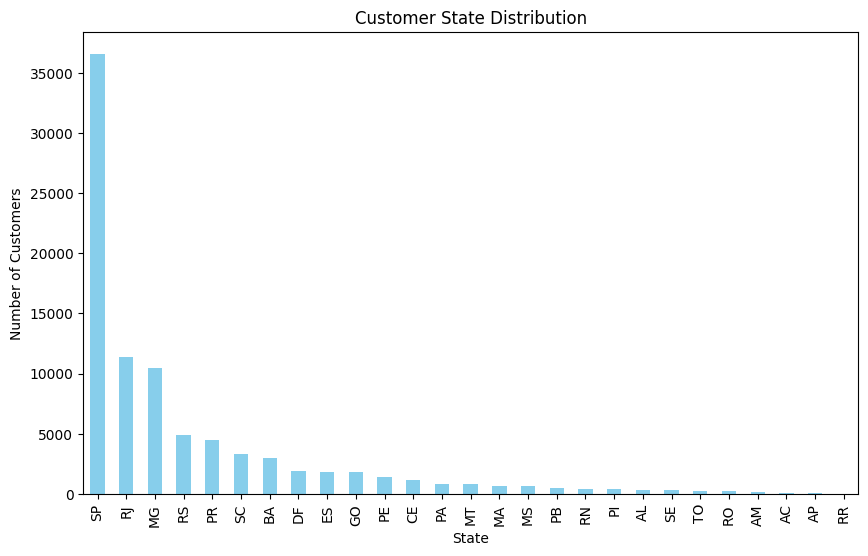

In [43]:
# Customer_state 컬럼의 값의 빈도를 계산
state_counts = customer['Customer_state'].value_counts()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
state_counts.plot(kind='bar', color='skyblue')  # 막대 그래프 그리기

# 그래프 제목 및 레이블 설정
plt.title('Customer State Distribution')
plt.xlabel('State')
plt.ylabel('Number of Customers')

# 그래프 보여주기
plt.show()

In [44]:
customer.isnull().sum()

Customer_id                0
Customer_unique_id         0
Customer_zipcode_prefix    0
Customer_city              0
Customer_state             0
dtype: int64

### Location

지역과 관련된 정보
- Geolocation_zipcode_prefix : 우편번호 앞부분
- Geolocation_lat : 위도  
- Geolocation_lng : 경도  
- Geolocation_city : 도시(city)  
- Geolocation_state : 주(state)  

In [45]:
location.head()

,Geolocation_zipcode_prefix,Geolocation_lat,Geolocation_lng,Geolocation_city,Geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [46]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Geolocation_zipcode_prefix  1000163 non-null  int64  
 1   Geolocation_lat             1000163 non-null  float64
 2   Geolocation_lng             1000163 non-null  float64
 3   Geolocation_city            1000163 non-null  object 
 4   Geolocation_state           1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [47]:
location.isnull().sum()

Geolocation_zipcode_prefix    0
Geolocation_lat               0
Geolocation_lng               0
Geolocation_city              0
Geolocation_state             0
dtype: int64

In [48]:
location = location.groupby(by=['Geolocation_zipcode_prefix', 'Geolocation_city', 'Geolocation_state'], as_index=False).median()

In [49]:
location_unique = location.drop_duplicates(subset='Geolocation_zipcode_prefix')
location_unique

,Geolocation_zipcode_prefix,Geolocation_city,Geolocation_state,Geolocation_lat,Geolocation_lng
0,1001,sao paulo,SP,-23.550498,-46.634027
2,1002,sao paulo,SP,-23.548551,-46.635072
4,1003,sao paulo,SP,-23.548976,-46.635318
6,1004,sao paulo,SP,-23.549535,-46.634822
8,1005,sao paulo,SP,-23.549612,-46.636719
...,...,...,...,...,...
27906,99960,charrua,RS,-27.953797,-52.029641
27907,99965,agua santa,RS,-28.179542,-52.035551
27908,99970,ciriaco,RS,-28.343273,-51.873734
27910,99980,david canabarro,RS,-28.388092,-51.846880


In [50]:
location1 = location.groupby('Geolocation_zipcode_prefix', as_index=False)[['Geolocation_lat','Geolocation_lng']].mean()

In [51]:
location_unique

,Geolocation_zipcode_prefix,Geolocation_city,Geolocation_state,Geolocation_lat,Geolocation_lng
0,1001,sao paulo,SP,-23.550498,-46.634027
2,1002,sao paulo,SP,-23.548551,-46.635072
4,1003,sao paulo,SP,-23.548976,-46.635318
6,1004,sao paulo,SP,-23.549535,-46.634822
8,1005,sao paulo,SP,-23.549612,-46.636719
...,...,...,...,...,...
27906,99960,charrua,RS,-27.953797,-52.029641
27907,99965,agua santa,RS,-28.179542,-52.035551
27908,99970,ciriaco,RS,-28.343273,-51.873734
27910,99980,david canabarro,RS,-28.388092,-51.846880


In [52]:
location = pd.merge(location1,location_unique[['Geolocation_zipcode_prefix','Geolocation_city','Geolocation_state']],on = 'Geolocation_zipcode_prefix',how='left')

In [53]:
location

,Geolocation_zipcode_prefix,Geolocation_lat,Geolocation_lng,Geolocation_city,Geolocation_state
0,1001,-23.550224,-46.634027,sao paulo,SP
1,1002,-23.546596,-46.634126,sao paulo,SP
2,1003,-23.549030,-46.635091,sao paulo,SP
3,1004,-23.549521,-46.634625,sao paulo,SP
4,1005,-23.549746,-46.635891,sao paulo,SP
...,...,...,...,...,...
19010,99960,-27.953797,-52.029641,charrua,RS
19011,99965,-28.179542,-52.035551,agua santa,RS
19012,99970,-28.342799,-51.874878,ciriaco,RS
19013,99980,-28.388092,-51.846880,david canabarro,RS


In [54]:
state_avg_lat = location.groupby('Geolocation_state')['Geolocation_lat'].median().reset_index()
state_avg_lat.columns = ['Geolocation_state', 'state_lat']
state_avg_lng = location.groupby('Geolocation_state')['Geolocation_lng'].median().reset_index()
state_avg_lng.columns = ['Geolocation_state', 'state_lng']

location = location.merge(state_avg_lat, on='Geolocation_state', how='left')
location = location.merge(state_avg_lng, on='Geolocation_state', how='left')
location

,Geolocation_zipcode_prefix,Geolocation_lat,Geolocation_lng,Geolocation_city,Geolocation_state,state_lat,state_lng
0,1001,-23.550224,-46.634027,sao paulo,SP,-23.525852,-46.677560
1,1002,-23.546596,-46.634126,sao paulo,SP,-23.525852,-46.677560
2,1003,-23.549030,-46.635091,sao paulo,SP,-23.525852,-46.677560
3,1004,-23.549521,-46.634625,sao paulo,SP,-23.525852,-46.677560
4,1005,-23.549746,-46.635891,sao paulo,SP,-23.525852,-46.677560
...,...,...,...,...,...,...,...
19010,99960,-27.953797,-52.029641,charrua,RS,-29.673304,-51.705644
19011,99965,-28.179542,-52.035551,agua santa,RS,-29.673304,-51.705644
19012,99970,-28.342799,-51.874878,ciriaco,RS,-29.673304,-51.705644
19013,99980,-28.388092,-51.846880,david canabarro,RS,-29.673304,-51.705644


In [55]:
state_avg_lat = location.groupby('Geolocation_city')['Geolocation_lat'].median().reset_index()
state_avg_lat.columns = ['Geolocation_city', 'city_lat']
state_avg_lng = location.groupby('Geolocation_city')['Geolocation_lng'].median().reset_index()
state_avg_lng.columns = ['Geolocation_city', 'city_lng']

# 2. 원래의 location DataFrame과 병합
location = location.merge(state_avg_lat, on='Geolocation_city', how='left')
location = location.merge(state_avg_lng, on='Geolocation_city', how='left')
location

,Geolocation_zipcode_prefix,Geolocation_lat,Geolocation_lng,Geolocation_city,Geolocation_state,state_lat,state_lng,city_lat,city_lng
0,1001,-23.550224,-46.634027,sao paulo,SP,-23.525852,-46.677560,-23.558486,-46.644467
1,1002,-23.546596,-46.634126,sao paulo,SP,-23.525852,-46.677560,-23.558486,-46.644467
2,1003,-23.549030,-46.635091,sao paulo,SP,-23.525852,-46.677560,-23.558486,-46.644467
3,1004,-23.549521,-46.634625,sao paulo,SP,-23.525852,-46.677560,-23.558486,-46.644467
4,1005,-23.549746,-46.635891,sao paulo,SP,-23.525852,-46.677560,-23.558486,-46.644467
...,...,...,...,...,...,...,...,...,...
19010,99960,-27.953797,-52.029641,charrua,RS,-29.673304,-51.705644,-27.953797,-52.029641
19011,99965,-28.179542,-52.035551,agua santa,RS,-29.673304,-51.705644,-28.179542,-52.035551
19012,99970,-28.342799,-51.874878,ciriaco,RS,-29.673304,-51.705644,-28.342799,-51.874878
19013,99980,-28.388092,-51.846880,david canabarro,RS,-29.673304,-51.705644,-28.388092,-51.846880


In [56]:
location_renamed = location.rename(columns={
    'Geolocation_zipcode_prefix': 'Customer_zipcode_prefix',
    'Geolocation_city': 'Customer_city',
    'Geolocation_state': 'Customer_state'
})

In [57]:
cusotmer_location = pd.merge(customer, location_renamed[['Customer_zipcode_prefix','Geolocation_lat','Geolocation_lng','state_lat','state_lng','city_lat','city_lng']],
                        on = ['Customer_zipcode_prefix'],
                        how='left')
cusotmer_location

,Customer_id,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Geolocation_lat,Geolocation_lng,state_lat,state_lng,city_lat,city_lng
0,CUSTOMER_00000,CUSTOMER_Unique_00000,14409,franca,SP,-20.502070,-47.396822,-23.525852,-46.677560,-20.529028,-47.392550
1,CUSTOMER_00001,CUSTOMER_Unique_00001,9790,sao bernardo do campo,SP,-23.726861,-46.543554,-23.525852,-46.677560,-23.673458,-46.570193
2,CUSTOMER_00002,CUSTOMER_Unique_00002,1151,sao paulo,SP,-23.531351,-46.656540,-23.525852,-46.677560,-23.558486,-46.644467
3,CUSTOMER_00003,CUSTOMER_Unique_00003,8775,mogi das cruzes,SP,-23.497390,-46.182342,-23.525852,-46.677560,-23.540510,-46.190874
4,CUSTOMER_00004,CUSTOMER_Unique_00004,89254,jaragua do sul,SC,-26.471185,-49.114043,-27.072618,-49.353794,-26.486080,-49.111059
...,...,...,...,...,...,...,...,...,...,...,...
87950,CUSTOMER_88083,CUSTOMER_Unique_85234,3937,sao paulo,SP,-23.586135,-46.499246,-23.525852,-46.677560,-23.558486,-46.644467
87951,CUSTOMER_88084,CUSTOMER_Unique_85235,6764,taboao da serra,SP,-23.615071,-46.766986,-23.525852,-46.677560,-23.618270,-46.785256
87952,CUSTOMER_88085,CUSTOMER_Unique_85236,60115,fortaleza,CE,-3.733993,-38.510418,-3.842353,-38.667633,-3.761911,-38.549473
87953,CUSTOMER_88086,CUSTOMER_Unique_85237,92120,canoas,RS,-29.949632,-51.169247,-29.673304,-51.705644,-29.915996,-51.164267


In [58]:
cusotmer_location.isnull().sum()

Customer_id                  0
Customer_unique_id           0
Customer_zipcode_prefix      0
Customer_city                0
Customer_state               0
Geolocation_lat            233
Geolocation_lng            233
state_lat                  233
state_lng                  233
city_lat                   233
city_lng                   233
dtype: int64

In [59]:
numeric_cols = ['Geolocation_lat', 'Geolocation_lng', 'state_lat', 'state_lng', 'city_lat', 'city_lng']

median_values = cusotmer_location.groupby(['Customer_state', 'Customer_city'], as_index=False)[numeric_cols].median()

In [60]:
# 결측값을 중앙값으로 채우기 위한 함수
def fill_missing_values(row, median_values):
    for col in numeric_cols:
        if pd.isna(row[col]):
            median_value = median_values.loc[
                (median_values['Customer_state'] == row['Customer_state']) &
                (median_values['Customer_city'] == row['Customer_city']),
                col
            ]
            if not median_value.empty:
                row[col] = median_value.values[0]
    return row

# 결측값 채우기
customer_location = cusotmer_location.apply(lambda row: fill_missing_values(row, median_values), axis=1)

In [61]:
# 결측값을 중앙값으로 채우기 위한 함수
def fill_missing_values2(row, median_values):
    for col in numeric_cols:
        if pd.isna(row[col]):
            median_value = median_values.loc[
                (median_values['Customer_state'] == row['Customer_state']),
                col
            ]
            if not median_value.empty:
                row[col] = median_value.values[0]
    return row

# 결측값 채우기
customer_location = customer_location.apply(lambda row: fill_missing_values2(row, median_values), axis=1)

In [62]:
customer_location.isnull().sum()

Customer_id                0
Customer_unique_id         0
Customer_zipcode_prefix    0
Customer_city              0
Customer_state             0
Geolocation_lat            0
Geolocation_lng            0
state_lat                  0
state_lng                  0
city_lat                   0
city_lng                   0
dtype: int64

In [63]:
location_renamed = location.rename(columns={
    'Geolocation_zipcode_prefix': 'Seller_zipcode_prefix',
    'Geolocation_city': 'Seller_city',
    'Geolocation_state': 'Seller_state'
})

In [64]:
seller_location = pd.merge(seller, location_renamed[['Seller_zipcode_prefix','Geolocation_lat','Geolocation_lng','state_lat','state_lng','city_lat','city_lng']],
                        on = ['Seller_zipcode_prefix'],
                        how='left')
seller_location

,Seller_id,Seller_zipcode_prefix,Seller_city,Seller_state,Geolocation_lat,Geolocation_lng,state_lat,state_lng,city_lat,city_lng
0,SELLER_0000,13023,campinas,SP,-22.894561,-47.062380,-23.525852,-46.677560,-22.899227,-47.064303
1,SELLER_0001,13844,mogi guacu,SP,-22.382538,-46.948099,-23.525852,-46.677560,-22.363232,-46.938124
2,SELLER_0002,12914,braganca paulista,SP,-22.963335,-46.535156,-23.525852,-46.677560,-22.946755,-46.541526
3,SELLER_0003,20920,rio de janeiro,RJ,-22.894692,-43.232735,-22.782162,-43.290876,-22.900371,-43.328187
4,SELLER_0004,55325,brejao,PE,-9.024839,-36.570200,-8.086550,-35.040567,-9.024839,-36.570200
...,...,...,...,...,...,...,...,...,...,...
2758,SELLER_2758,87111,sarandi,PR,-23.448778,-51.869229,-24.952812,-51.249255,-23.445197,-51.873853
2759,SELLER_2759,88137,palhoca,SC,-27.627185,-48.674017,-27.072618,-49.353794,-27.648365,-48.666927
2760,SELLER_2760,4650,sao paulo,SP,-23.658011,-46.677401,-23.525852,-46.677560,-23.558486,-46.644467
2761,SELLER_2761,96080,pelotas,RS,-31.751451,-52.323899,-29.673304,-51.705644,-31.749900,-52.328733


In [65]:
seller_location.isnull().sum()

Seller_id                0
Seller_zipcode_prefix    0
Seller_city              0
Seller_state             0
Geolocation_lat          7
Geolocation_lng          7
state_lat                7
state_lng                7
city_lat                 7
city_lng                 7
dtype: int64

In [66]:
median_values = seller_location.groupby(['Seller_state', 'Seller_city'], as_index=False)[numeric_cols].median()

In [67]:
# 결측값을 중앙값으로 채우기 위한 함수
def fill_missing_values(row, median_values):
    for col in numeric_cols:
        if pd.isna(row[col]):
            median_value = median_values.loc[
                (median_values['Seller_state'] == row['Seller_state']) &
                (median_values['Seller_city'] == row['Seller_city']),
                col
            ]
            if not median_value.empty:
                row[col] = median_value.values[0]
    return row

# 결측값 채우기
seller_location = seller_location.apply(lambda row: fill_missing_values(row, median_values), axis=1)

In [68]:
seller_location.isnull().sum()

Seller_id                0
Seller_zipcode_prefix    0
Seller_city              0
Seller_state             0
Geolocation_lat          0
Geolocation_lng          0
state_lat                0
state_lng                0
city_lat                 0
city_lng                 0
dtype: int64

In [69]:
# cusotmer_location.to_csv('customer_location.csv')

In [124]:
# # 지도의 중심점 설정 (위도, 경도 순서)
# map_center = [-23.658011, -46.677401]  # 중심점은 예시 데이터의 중앙값으로 설정합니다.

# # 지도 생성
# mymap = folium.Map(location=map_center, zoom_start=12)  # zoom_start는 초기 확대 수준을 나타냅니다.

# # 데이터프레임의 각 행에 대해 마커 추가
# for index, row in seller_location.iterrows():
#     folium.Marker(
#         location=[row['state_lat'], row['state_lng']],
#         popup=row['Seller_state']
#     ).add_to(mymap)

# # 지도 저장 (이 코드는 Jupyter Notebook에서 실행할 경우 불필요합니다)
# mymap.save("mymap.html")

# # 지도 출력
# mymap


### order_items

주문 아이템과 관련된 정보    
- Order_id : 주문 고유 ID  
- Order_item_id : 동일한 주문에 포함된 품목 수를 식별하는 일련 번호  
- Product_id : 제품 고유 ID  
- Seller_id : 판매자 고유 ID  
- Price : 판매 가격  
- Freight_value : 품목 화물 가격  

In [71]:
order_item = order_items.copy()

In [72]:
order_item.head()

,Order_id,Order_item_id,Product_id,Seller_id,Price,Freight_value
0,ORDER_75477,1,PRODUCT_23128,SELLER_0452,58.9,13.29
1,ORDER_63604,1,PRODUCT_24351,SELLER_0414,239.9,19.93
2,ORDER_05566,1,PRODUCT_20226,SELLER_1637,199.0,17.87
3,ORDER_04632,1,PRODUCT_07878,SELLER_1445,199.9,18.14
4,ORDER_61452,1,PRODUCT_03505,SELLER_0581,21.9,12.69


In [73]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100557 entries, 0 to 100556
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_id       100557 non-null  object 
 1   Order_item_id  100557 non-null  int64  
 2   Product_id     100557 non-null  object 
 3   Seller_id      100557 non-null  object 
 4   Price          100557 non-null  float64
 5   Freight_value  100557 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [74]:
order_item.isnull().sum()

Order_id         0
Order_item_id    0
Product_id       0
Seller_id        0
Price            0
Freight_value    0
dtype: int64

In [75]:
order_item = order_item.groupby(['Order_id','Product_id','Seller_id'])[['Price','Freight_value']].sum().reset_index()

### orders

주문과 관련된 정보  
- Order_id : 주문 고유 ID  
- Customer_id : 고객 ID  
- Order_status : 주문 상태  
- Order_purchase_timestamp : 구매 시간  
- Order_delivered_carrier_date : 물류 처리 시간  
- Order_delivered_customer_date : 실제 배송 날짜  
- Order_estimated_delivery_date : 기대 배송 날짜  

In [76]:
order.head()

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07


In [77]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87955 entries, 0 to 87954
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Order_id                       87955 non-null  object
 1   Customer_id                    87955 non-null  object
 2   Order_status                   87955 non-null  object
 3   Order_purchase_timestamp       87955 non-null  object
 4   Order_delivered_carrier_date   87955 non-null  object
 5   Order_delivered_customer_date  87955 non-null  object
 6   Order_estimated_delivery_date  87955 non-null  object
dtypes: object(7)
memory usage: 4.7+ MB


In [78]:
order['Order_status'].value_counts()

Order_status
delivered    87949
canceled         6
Name: count, dtype: int64

In [79]:
# 데이트 타입 변환
order['Order_purchase_timestamp'] = pd.to_datetime(order['Order_purchase_timestamp'])
order['Order_delivered_carrier_date'] = pd.to_datetime(order['Order_delivered_carrier_date'])
order['Order_delivered_customer_date'] = pd.to_datetime(order['Order_delivered_customer_date'])
order['Order_estimated_delivery_date'] = pd.to_datetime(order['Order_estimated_delivery_date'])

In [80]:
# 배송 소요일 : 실제 배송 날짜 - 구매 시간
order['delivered_date'] = order['Order_delivered_customer_date'] - order['Order_purchase_timestamp']

In [81]:
# 평균 배송 소요 시간
order['delivered_date'].mean()

Timedelta('12 days 21:43:44.891114774')

In [82]:
# 실제 배송 날짜와 기대 배송 날짜와 차이 계산 (timedelta 객체)
order['date_diff'] = order['Order_delivered_customer_date'] - order['Order_estimated_delivery_date']

# 실제 배송 날짜가 예측 배송 날짜보다 늦었는지 여부
order['is_late'] = order['date_diff'] > pd.Timedelta(0)

In [83]:
order['Order_status'].value_counts()

Order_status
delivered    87949
canceled         6
Name: count, dtype: int64

In [84]:
# 가장 마지막 주문 날짜는 2019-07-30. 데이터가 2019년 7월까지 존재
order['Order_estimated_delivery_date'].max()

Timestamp('2019-09-06 00:00:00')

In [85]:
idx = order[order['Order_status']=='canceled'].index

In [86]:
idx

Index([2591, 7768, 51467, 52410, 81922, 83484], dtype='int64')

In [87]:
order = order.drop(idx)

In [88]:
order

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,delivered_date,date_diff,is_late
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,8 days 10:28:40,-8 days +21:25:13,False
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,13 days 05:00:36,-13 days +00:28:42,False
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,2 days 20:58:23,-10 days +18:17:02,False
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,16 days 13:00:50,-6 days +10:57:55,False
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,9 days 23:45:21,-12 days +12:55:51,False
...,...,...,...,...,...,...,...,...,...,...
87950,ORDER_88083,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28,8 days 05:13:56,-11 days +15:08:01,False
87951,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02,22 days 04:38:58,-2 days +17:37:56,False
87952,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27,24 days 20:37:34,-6 days +11:24:17,False
87953,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15,17 days 02:04:27,-21 days +23:32:54,False


### Payments

지불과 관련된 정보  
- Order_id : 주문 고유 ID  
- Payment_sequential : 결제 시퀀스(둘 이상의 결제 방법으로 결제 가능)  
- Payment_type : 지불 방법   
- Payment_installments : 할부 횟수  
- Payment_value : 거래 가치  

In [89]:
payment.head()

,Order_id,Payment_sequential,Payment_type,Payment_installments,Payment_value
0,ORDER_66617,1,credit_card,8,99.33
1,ORDER_86954,1,credit_card,1,24.39
2,ORDER_38852,1,credit_card,1,65.71
3,ORDER_57443,1,credit_card,8,107.78
4,ORDER_11244,1,credit_card,2,128.45


In [90]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91971 entries, 0 to 91970
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_id              91971 non-null  object 
 1   Payment_sequential    91971 non-null  int64  
 2   Payment_type          91971 non-null  object 
 3   Payment_installments  91971 non-null  int64  
 4   Payment_value         91971 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.5+ MB


In [91]:
order.isnull().sum()

Order_id                         0
Customer_id                      0
Order_status                     0
Order_purchase_timestamp         0
Order_delivered_carrier_date     0
Order_delivered_customer_date    0
Order_estimated_delivery_date    0
delivered_date                   0
date_diff                        0
is_late                          0
dtype: int64

### products

제품과 관련된 정보  
- Product_id : 제품 고유 ID  
- Product_category_name : 카테고리 이름  
- Product_weight_g : 제품 무게(g)  
- Product_length_cm : 제품 길이(cm)  
- Product_height_cm : 제품 높이(cm)  
- Product_width_cm : 제품 너비(cm)  

In [92]:
product.head()

,Product_id,Product_category_name,Product_weight_g,Product_length_cm,Product_height_cm,Product_width_cm
0,PRODUCT_00000,perfumery,225.0,16.0,10.0,14.0
1,PRODUCT_00001,arts,1000.0,30.0,18.0,20.0
2,PRODUCT_00002,sports_leisure,154.0,18.0,9.0,15.0
3,PRODUCT_00003,home_utilities,625.0,20.0,17.0,13.0
4,PRODUCT_00004,musical_instruments,200.0,38.0,5.0,11.0


In [93]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29471 entries, 0 to 29470
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Product_id             29471 non-null  object
 1   Product_category_name  29471 non-null  object
 2   Product_weight_g       29471 non-null  object
 3   Product_length_cm      29471 non-null  object
 4   Product_height_cm      29471 non-null  object
 5   Product_width_cm       29471 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


In [94]:
product.isnull().sum()

Product_id               0
Product_category_name    0
Product_weight_g         0
Product_length_cm        0
Product_height_cm        0
Product_width_cm         0
dtype: int64

### reviews

리뷰와 관련된 정보  
- Review_id : 리뷰 고유 ID  
- Order_id : 주문 고유 ID  
- Review_score : 리뷰 점수  
- Review_creation_date : 리뷰 생성 시간  
- Review_answer_timestamp : 리뷰 답변 시간  


In [95]:
review.head()

,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp
0,REVIEW_00000,ORDER_01674,4,2019-01-18 00:00:00,2019-01-18 21:46:59
1,REVIEW_00001,ORDER_80140,5,2019-03-10 00:00:00,2019-03-11 03:05:13
2,REVIEW_00002,ORDER_69816,5,2019-02-17 00:00:00,2019-02-18 14:36:24
3,REVIEW_00003,ORDER_24398,5,2018-04-21 00:00:00,2018-04-21 22:02:06
4,REVIEW_00004,ORDER_70366,5,2019-03-01 00:00:00,2019-03-02 10:26:53


In [96]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87873 entries, 0 to 87872
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Review_id                87873 non-null  object
 1   Order_id                 87873 non-null  object
 2   Review_score             87873 non-null  int64 
 3   Review_creation_date     87873 non-null  object
 4   Review_answer_timestamp  87873 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [97]:
# 데이트 타입 변환
review['Review_creation_date'] = pd.to_datetime(review['Review_creation_date'])
review['Review_answer_timestamp'] = pd.to_datetime(review['Review_answer_timestamp'])

In [98]:
review.isnull().sum()

Review_id                  0
Order_id                   0
Review_score               0
Review_creation_date       0
Review_answer_timestamp    0
dtype: int64

### sellers

판매자와 관련된 정보  
- Seller_id : 판매자 고유 ID  
- Seller_zipcode_prefix : 판매자 우편번호 앞자리  
- Seller_city : 판매자 도시(city)  
- Seller_state : 판매자 주(state)  

In [99]:
seller.head()

,Seller_id,Seller_zipcode_prefix,Seller_city,Seller_state
0,SELLER_0000,13023,campinas,SP
1,SELLER_0001,13844,mogi guacu,SP
2,SELLER_0002,12914,braganca paulista,SP
3,SELLER_0003,20920,rio de janeiro,RJ
4,SELLER_0004,55325,brejao,PE


In [100]:
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763 entries, 0 to 2762
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Seller_id              2763 non-null   object
 1   Seller_zipcode_prefix  2763 non-null   int64 
 2   Seller_city            2763 non-null   object
 3   Seller_state           2763 non-null   object
dtypes: int64(1), object(3)
memory usage: 86.5+ KB


In [101]:
seller.isnull().sum()

Seller_id                0
Seller_zipcode_prefix    0
Seller_city              0
Seller_state             0
dtype: int64

# 데이터 분석

In [102]:
order_item = order_item.groupby(['Order_id','Product_id','Seller_id'])[['Price','Freight_value']].sum().reset_index()

In [103]:
order['InvoiceYearMonth'] = order['Order_purchase_timestamp'].dt.strftime('%Y%m')

merged_orders = pd.merge(order, order_item, on='Order_id', how='left')
merged_orders

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,delivered_date,date_diff,is_late,InvoiceYearMonth,Product_id,Seller_id,Price,Freight_value
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,8 days 10:28:40,-8 days +21:25:13,False,201810,PRODUCT_02093,SELLER_0491,29.99,8.72
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,13 days 05:00:36,-13 days +00:28:42,False,201811,PRODUCT_26747,SELLER_2662,45.00,27.20
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,2 days 20:58:23,-10 days +18:17:02,False,201902,PRODUCT_10598,SELLER_1354,19.90,8.72
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,16 days 13:00:50,-6 days +10:57:55,False,201807,PRODUCT_16703,SELLER_1518,147.90,27.36
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,9 days 23:45:21,-12 days +12:55:51,False,201805,PRODUCT_08274,SELLER_1599,59.99,15.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91287,ORDER_88083,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28,8 days 05:13:56,-11 days +15:08:01,False,201803,PRODUCT_16488,SELLER_2296,72.00,13.08
91288,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02,22 days 04:38:58,-2 days +17:37:56,False,201902,PRODUCT_01588,SELLER_0031,174.90,20.10
91289,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27,24 days 20:37:34,-6 days +11:24:17,False,201808,PRODUCT_13335,SELLER_1892,205.99,65.02
91290,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15,17 days 02:04:27,-21 days +23:32:54,False,201901,PRODUCT_07372,SELLER_2445,359.98,81.18


In [104]:
merged_orders.isnull().sum()

Order_id                         0
Customer_id                      0
Order_status                     0
Order_purchase_timestamp         0
Order_delivered_carrier_date     0
Order_delivered_customer_date    0
Order_estimated_delivery_date    0
delivered_date                   0
date_diff                        0
is_late                          0
InvoiceYearMonth                 0
Product_id                       1
Seller_id                        1
Price                            1
Freight_value                    1
dtype: int64

In [105]:
merged_orders.dropna(inplace=True)

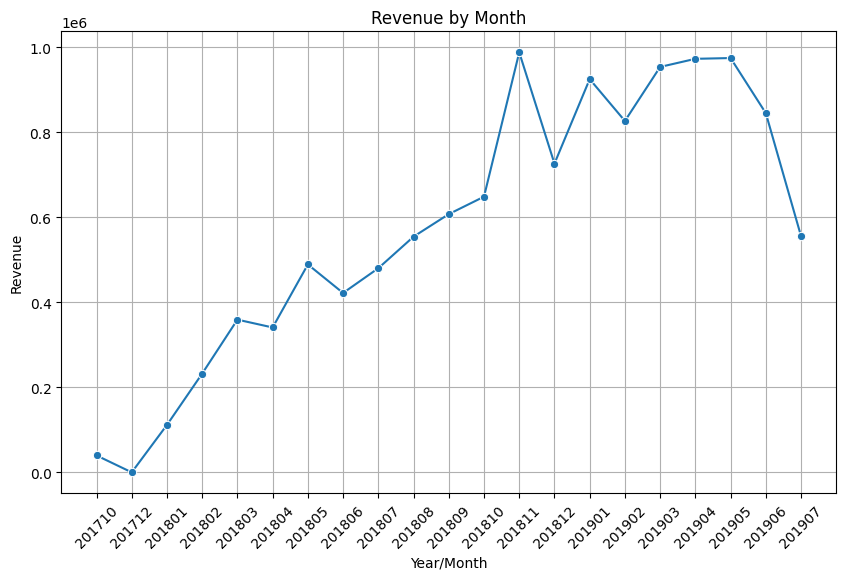

In [106]:
monthly_revenue = merged_orders.groupby('InvoiceYearMonth')['Price'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='InvoiceYearMonth', y='Price', data=monthly_revenue, marker='o')
plt.title('Revenue by Month')
plt.xlabel('Year/Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

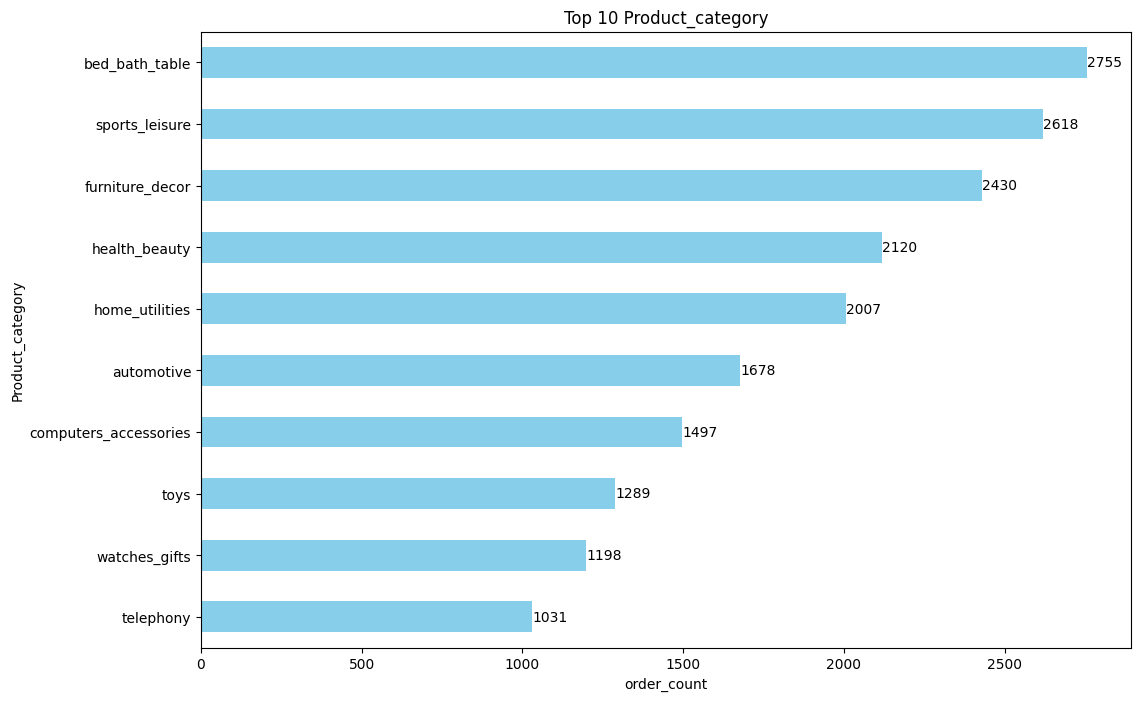

In [107]:
# 카테고리별 주문 수 계산
category_cnt = product['Product_category_name'].value_counts().head(10)

plt.figure(figsize=(12, 8))
bars = category_cnt.sort_values(ascending=True).plot(kind='barh', color='skyblue')

plt.title('Top 10 Product_category')
plt.xlabel('order_count')
plt.ylabel('Product_category')

# 각 바 위에 값 표시
for bar in bars.containers[0]:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center')

plt.show()

In [108]:
orders_customers = pd.merge(order, customer, on='Customer_id', how='inner')
orders_monthly_active = orders_customers.groupby('InvoiceYearMonth')['Customer_unique_id'].nunique().reset_index()

orders_monthly_active

,InvoiceYearMonth,Customer_unique_id
0,201709,1
1,201710,258
2,201712,1
3,201801,716
4,201802,1616
5,201803,2507
6,201804,2274
7,201805,3477
8,201806,3075
9,201807,3791


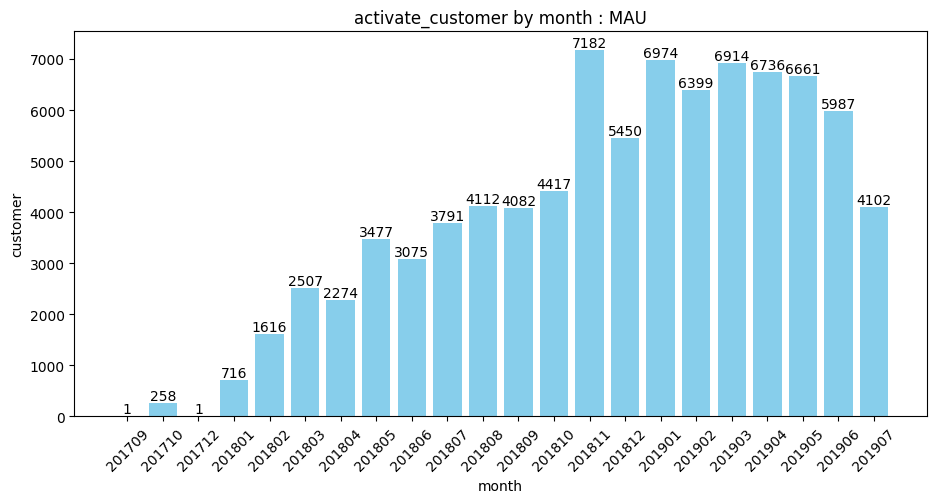

In [109]:
# 바 차트 그리기
plt.figure(figsize=(11, 5))
bars = plt.bar(orders_monthly_active['InvoiceYearMonth'], orders_monthly_active['Customer_unique_id'], color='skyblue')

# 타이틀 및 라벨 설정
plt.title('activate_customer by month : MAU')
plt.xlabel('month')
plt.ylabel('customer')
plt.xticks(rotation=45)

# 각 바 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.show()

In [110]:
orders_monthly_active

,InvoiceYearMonth,Customer_unique_id
0,201709,1
1,201710,258
2,201712,1
3,201801,716
4,201802,1616
5,201803,2507
6,201804,2274
7,201805,3477
8,201806,3075
9,201807,3791


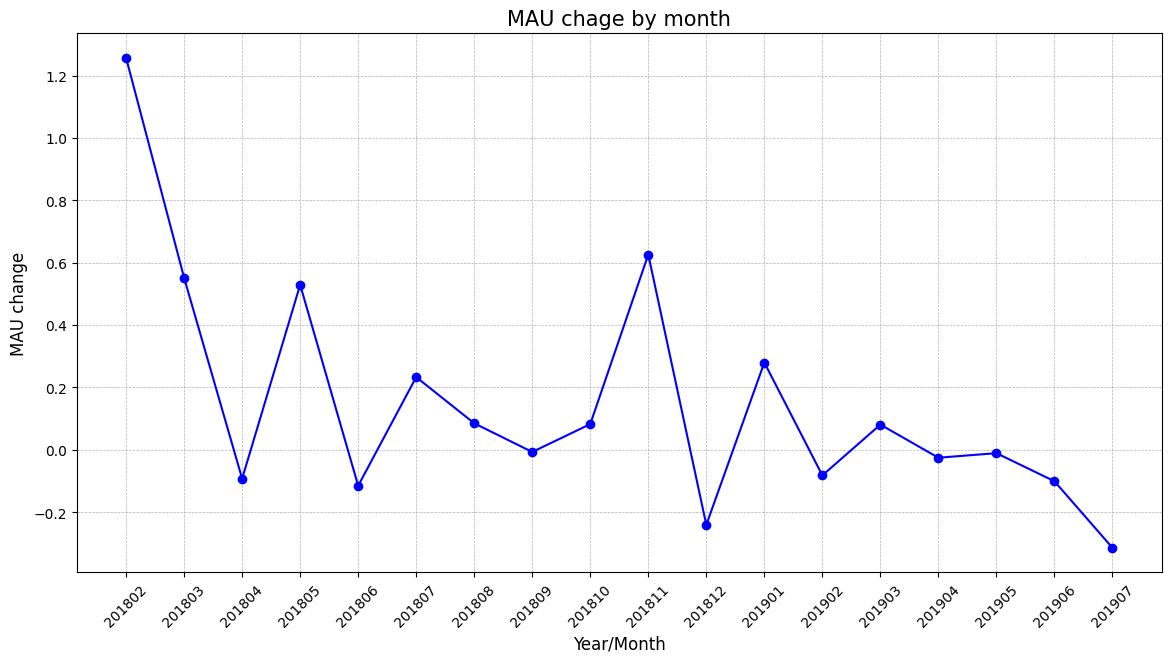

In [111]:
orders_monthly_active['MonthlyChange'] = orders_monthly_active['Customer_unique_id'].pct_change()

filtered_data = orders_monthly_active.query("InvoiceYearMonth > '201801'")


plt.figure(figsize=(14, 7))
plt.plot(filtered_data['InvoiceYearMonth'], filtered_data['MonthlyChange'], marker='o', linestyle='-', color='blue')
plt.title('MAU chage by month', fontsize=15)
plt.xlabel('Year/Month', fontsize=12)
plt.ylabel('MAU change', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [112]:
merged_orders

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,delivered_date,date_diff,is_late,InvoiceYearMonth,Product_id,Seller_id,Price,Freight_value
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,8 days 10:28:40,-8 days +21:25:13,False,201810,PRODUCT_02093,SELLER_0491,29.99,8.72
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,13 days 05:00:36,-13 days +00:28:42,False,201811,PRODUCT_26747,SELLER_2662,45.00,27.20
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,2 days 20:58:23,-10 days +18:17:02,False,201902,PRODUCT_10598,SELLER_1354,19.90,8.72
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,16 days 13:00:50,-6 days +10:57:55,False,201807,PRODUCT_16703,SELLER_1518,147.90,27.36
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,9 days 23:45:21,-12 days +12:55:51,False,201805,PRODUCT_08274,SELLER_1599,59.99,15.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91287,ORDER_88083,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28,8 days 05:13:56,-11 days +15:08:01,False,201803,PRODUCT_16488,SELLER_2296,72.00,13.08
91288,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02,22 days 04:38:58,-2 days +17:37:56,False,201902,PRODUCT_01588,SELLER_0031,174.90,20.10
91289,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27,24 days 20:37:34,-6 days +11:24:17,False,201808,PRODUCT_13335,SELLER_1892,205.99,65.02
91290,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15,17 days 02:04:27,-21 days +23:32:54,False,201901,PRODUCT_07372,SELLER_2445,359.98,81.18


In [113]:
monthly_revenue = merged_orders.groupby('InvoiceYearMonth')['Price'].sum().reset_index()
monthly_order = merged_orders.groupby('InvoiceYearMonth')['Order_id'].nunique().reset_index()

In [114]:
monthly_revenue_order = pd.merge(monthly_revenue,monthly_order,on='InvoiceYearMonth')

In [87]:
monthly_revenue_order['AOV'] = monthly_revenue_order['Price']/monthly_revenue_order['Order_id']

In [88]:
monthly_revenue_order

,InvoiceYearMonth,Price,Order_id,AOV
0,201710,39738.17,261,152.253525
1,201712,10.90,1,10.900000
2,201801,111523.82,747,149.295609
3,201802,232248.27,1639,141.701202
4,201803,359109.85,2545,141.104067
5,201804,340669.68,2303,147.924307
6,201805,488869.27,3544,137.942796
7,201806,421781.48,3134,134.582476
8,201807,480004.62,3861,124.321321
9,201808,554227.91,4191,132.242403


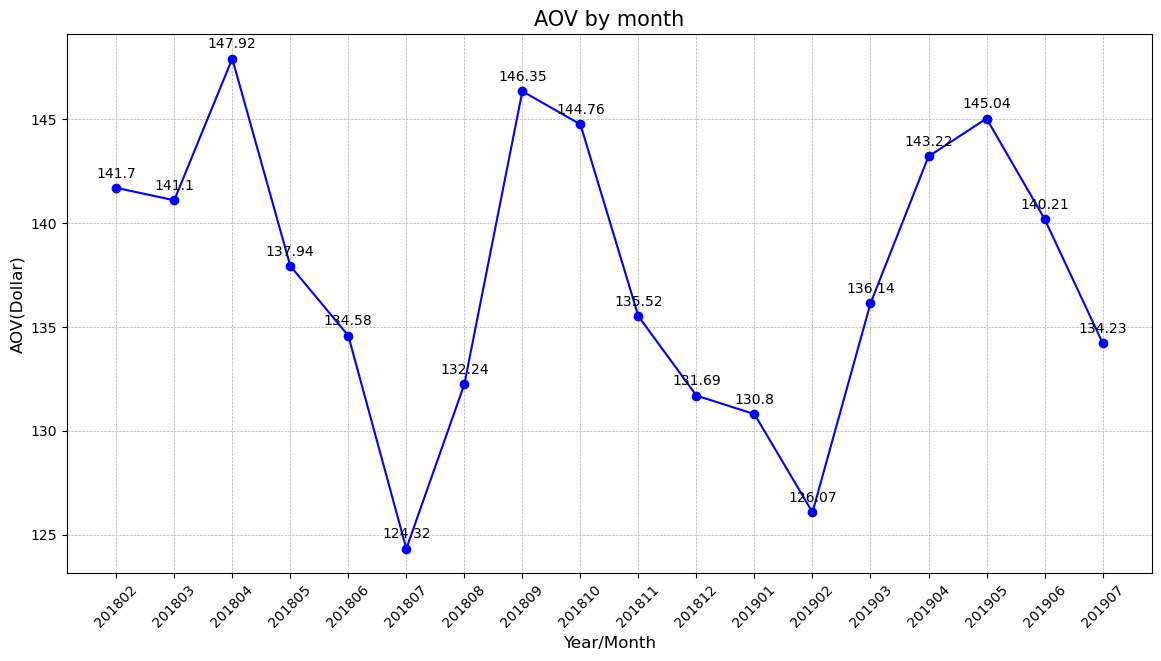

In [89]:
# 필터링된 데이터
filtered_data = monthly_revenue_order.query("InvoiceYearMonth > '201801'")

# 그래프 설정
plt.figure(figsize=(14, 7))
plt.plot(filtered_data['InvoiceYearMonth'], filtered_data['AOV'], marker='o', linestyle='-', color='blue')

# 제목과 축 레이블 설정
plt.title('AOV by month', fontsize=15)
plt.xlabel('Year/Month', fontsize=12)
plt.ylabel('AOV(Dollar)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5)

# 각 데이터 포인트 위에 값 표시
for i, txt in enumerate(filtered_data['AOV']):
    plt.text(filtered_data['InvoiceYearMonth'].iloc[i], filtered_data['AOV'].iloc[i] + 0.5, round(txt, 2), ha='center')

# 그래프 표시
plt.show()


In [90]:
# orders_customers.to_csv('order_customers.csv', index=False)

In [91]:
orders_customers['delivered_date'].max()

Timedelta('209 days 15:05:12')

In [92]:
orders_customers[orders_customers['date_diff']==orders_customers['date_diff'].min()]

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,delivered_date,date_diff,is_late,InvoiceYearMonth,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state
35399,ORDER_35461,CUSTOMER_29454,delivered,2019-03-06 09:47:07,2019-03-07 21:33:39,2019-03-09 23:36:47,2019-08-03,3 days 13:49:40,-147 days +23:36:47,False,201903,CUSTOMER_Unique_29116,13175,sumare,SP


In [93]:
orders_customers['delivered_date'].max()

Timedelta('209 days 15:05:12')

In [94]:
orders_customers[orders_customers['delivered_date']==orders_customers['delivered_date'].max()]

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,delivered_date,date_diff,is_late,InvoiceYearMonth,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state
17324,ORDER_17355,CUSTOMER_24614,delivered,2018-02-21 23:31:27,2018-03-08 13:47:46,2018-09-19 14:36:39,2018-03-22,209 days 15:05:12,181 days 14:36:39,True,201802,CUSTOMER_Unique_24367,29890,montanha,ES


In [95]:
orders_customers = pd.merge(orders_customers, order_item, on= 'Order_id',how='left')

In [96]:
orders_customers=pd.merge(orders_customers,product[['Product_id','Product_category_name']], on= 'Product_id',how='left')

In [97]:
orders_customers.groupby('Product_category_name')['delivered_date'].mean()

Product_category_name
Unknown                      12 days 19:41:55.049743964
agro_industry_and_commerce   11 days 22:47:58.339743589
air_conditioning             12 days 05:37:03.914798206
arts                         11 days 06:29:42.360465116
arts_and_crafts               4 days 17:33:57.363636363
                                        ...            
technical_books              11 days 07:36:43.852678571
telephony                    13 days 04:27:21.084635416
the_kitchen                   7 days 17:52:42.846153846
toys                         11 days 22:04:09.788075880
watches_gifts                13 days 00:51:40.304006284
Name: delivered_date, Length: 72, dtype: timedelta64[ns]

In [98]:
orders_customers.groupby('Customer_state')['delivered_date'].mean()

Customer_state
AC   21 days 16:39:06.824324324
AL   24 days 18:31:49.413978494
AM   27 days 04:16:02.860465116
AP   29 days 10:12:50.677419355
BA   19 days 17:11:12.252272727
CE   21 days 16:22:30.003262642
DF   13 days 05:18:06.105803800
ES   15 days 22:30:06.127042699
GO   15 days 19:33:33.639169771
MA   21 days 21:34:39.571847507
MG   12 days 06:50:29.750391452
MS   15 days 18:37:09.574923547
MT   18 days 07:33:28.095794392
PA   24 days 13:09:21.888392857
PB             21 days 00:08:55
PE   18 days 19:34:13.647574124
PI   19 days 23:04:42.294382022
PR   12 days 05:19:17.937956204
RJ   15 days 16:40:23.503092434
RN   19 days 14:15:15.622807017
RO   19 days 19:02:04.404166666
RR   29 days 18:25:05.947368421
RS   15 days 15:14:02.932941176
SC   15 days 09:03:27.791691219
SE   22 days 11:03:27.279069767
SP    8 days 22:36:10.545614727
TO   17 days 20:45:50.589843750
Name: delivered_date, dtype: timedelta64[ns]

In [99]:
orders_customers['date_diff_days'] = orders_customers['date_diff'].dt.days
orders_customers['delivered_date_days'] = orders_customers['delivered_date'].dt.days

In [100]:
orders_customers.groupby('InvoiceYearMonth')['delivered_date_days'].mean()

InvoiceYearMonth
201709    54.000000
201710    19.091241
201712     4.000000
201801    12.025608
201802    12.570501
201803    12.492968
201804    14.302609
201805    10.815639
201806    11.525894
201807    11.073474
201808    10.510780
201809    11.341554
201810    11.328773
201811    14.633355
201812    14.859919
201901    13.544961
201902    16.442959
201903    15.764592
201904    10.986586
201905    10.910824
201906     8.529374
201907     6.980626
Name: delivered_date_days, dtype: float64

In [101]:
orders_customers['carrier_diff'] = orders_customers['Order_delivered_carrier_date'] - orders_customers['Order_purchase_timestamp']

In [102]:
orders_customers['carrier_diff_days'] = orders_customers['carrier_diff'].dt.days

In [103]:
orders_customers['estimated_date'] =  orders_customers['Order_estimated_delivery_date'] - orders_customers['Order_purchase_timestamp']

In [104]:
orders_customers['estimated_date_days'] = orders_customers['estimated_date'].dt.days

In [105]:
# orders_customers.to_csv('order_customers.csv',index=False)

In [106]:
# orders_customers = pd.merge(orders_customers, review, on= 'Order_id',how='left')

In [107]:
# orders_customers.isnull().sum()

### 리뷰 데이터

In [108]:
review_df = pd.merge(order, review, on= 'Order_id',how='right')
review_df = pd.merge(review_df, order_item, on= 'Order_id',how='left')
review_df = pd.merge(review_df, product, on= 'Product_id',how='left')
review_df = pd.merge(review_df, customer, on= 'Customer_id',how='left')

In [109]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91223 entries, 0 to 91222
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   Order_id                       91223 non-null  object         
 1   Customer_id                    91216 non-null  object         
 2   Order_status                   91216 non-null  object         
 3   Order_purchase_timestamp       91216 non-null  datetime64[ns] 
 4   Order_delivered_carrier_date   91216 non-null  datetime64[ns] 
 5   Order_delivered_customer_date  91216 non-null  datetime64[ns] 
 6   Order_estimated_delivery_date  91216 non-null  datetime64[ns] 
 7   delivered_date                 91216 non-null  timedelta64[ns]
 8   date_diff                      91216 non-null  timedelta64[ns]
 9   is_late                        91216 non-null  object         
 10  InvoiceYearMonth               91216 non-null  object         
 11  Re

In [110]:
review_df.dropna(inplace=True)

In [111]:
review_df.head()

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,delivered_date,date_diff,is_late,...,Freight_value,Product_category_name,Product_weight_g,Product_length_cm,Product_height_cm,Product_width_cm,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state
0,ORDER_01674,CUSTOMER_38995,delivered,2019-01-11 15:30:49,2019-01-12 21:57:22,2019-01-17 18:42:41,2019-02-02,6 days 03:11:52,-16 days +18:42:41,False,...,27.26,sports_leisure,1300.0,30.0,30.0,35.0,CUSTOMER_Unique_38397,6030.0,osasco,SP
1,ORDER_80140,CUSTOMER_81808,delivered,2019-02-28 12:25:19,2019-03-02 19:08:15,2019-03-09 23:17:20,2019-03-14,9 days 10:52:01,-5 days +23:17:20,False,...,8.30,computers_accessories,245.0,19.0,14.0,14.0,CUSTOMER_Unique_79322,13380.0,nova odessa,SP
2,ORDER_69816,CUSTOMER_27108,delivered,2019-02-03 09:56:22,2019-02-06 16:18:28,2019-02-16 17:28:48,2019-03-09,13 days 07:32:26,-21 days +17:28:48,False,...,45.12,computers_accessories,6550.0,20.0,20.0,20.0,CUSTOMER_Unique_26812,44571.0,santo antonio de jesus,BA
3,ORDER_24398,CUSTOMER_62103,delivered,2018-04-09 17:41:13,2018-04-10 14:24:47,2018-04-20 09:08:35,2018-05-10,10 days 15:27:22,-20 days +09:08:35,False,...,42.85,garden_tools,7650.0,20.0,20.0,20.0,CUSTOMER_Unique_60663,88735.0,gravatal,SC
4,ORDER_70366,CUSTOMER_57462,delivered,2019-02-10 10:59:03,2019-02-15 19:36:14,2019-02-28 16:33:35,2019-03-09,18 days 05:34:32,-9 days +16:33:35,False,...,134.25,sports_leisure,9850.0,105.0,35.0,50.0,CUSTOMER_Unique_56232,89520.0,curitibanos,SC


In [112]:
# 리뷰 평점 3점 미만인 Order의 평균 배달 시간
review_df[review_df['Review_score']<3]['delivered_date'].mean()

Timedelta('19 days 22:38:55.117969059')

In [113]:
# 리뷰 평점 3점 초과인 Order의 평균 배달 시간
review_df[review_df['Review_score']>3]['delivered_date'].mean()

Timedelta('11 days 08:30:57.126348597')

In [114]:
review_df[review_df['is_late']==False]['Review_score'].mean()

4.2526722900428275

In [115]:
review_df[review_df['is_late']==True]['Review_score'].mean()

2.4513287117273252

In [116]:
review_df['delivered_date_days'] = review_df['delivered_date'].dt.days

In [117]:
review_df['date_diff_days'] = review_df['date_diff'].dt.days

In [118]:
review_df[['delivered_date','Review_score']].corr()

,delivered_date,Review_score
delivered_date,1.000000,-0.322947
Review_score,-0.322947,1.000000


In [119]:
review_df['delivered_date'] = review_df['delivered_date'].dt.days
review_df['date_diff'] = review_df['date_diff'].dt.days

In [120]:
corr_matrix = review_df[['Review_score','delivered_date','date_diff','is_late','Price','Freight_value']].corr()

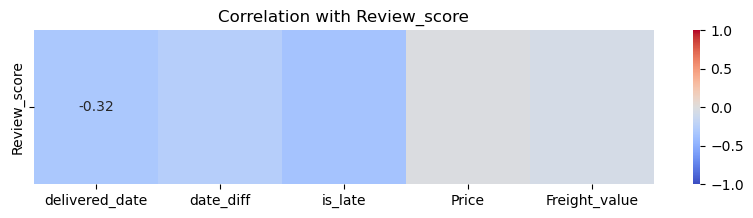

In [121]:
# Review_score와 관련된 행과 열만 선택
corr_matrix_review_score = corr_matrix.loc[['Review_score'], ['delivered_date','date_diff', 'is_late', 'Price', 'Freight_value']]

# 히트맵 그리기
plt.figure(figsize=(10, 2))
sns.heatmap(corr_matrix_review_score, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Review_score')
plt.show()

In [122]:
# 교차 분할표 생성
contingency_table = pd.crosstab(review_df['Product_category_name'], review_df['Review_score'])
print("Contingency Table:")
print(contingency_table)

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("\nChi2 Stat:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")

Contingency Table:
Review_score                  1    2    3    4     5
Product_category_name                               
Unknown                     197   49   82  278   759
agro_industry_and_commerce   15    5   12   37    87
air_conditioning             24    6   16   43   130
arts                         15    7   16   33    99
arts_and_crafts               1    0    3    3     4
...                         ...  ...  ...  ...   ...
technical_books              16    7    8   33   161
telephony                   413  143  397  821  2046
the_kitchen                   2    0    0    1     9
toys                        337   91  277  662  2304
watches_gifts               556  172  426  967  2940

[72 rows x 5 columns]

Chi2 Stat: 1251.3782607644448
P-value: 2.429597722819687e-121
Degrees of Freedom: 284
Expected Frequencies:


In [123]:
review_df.groupby('Product_category_name')['Review_score'].mean()

Product_category_name
Unknown                       3.991209
agro_industry_and_commerce    4.128205
air_conditioning              4.136986
arts                          4.141176
arts_and_crafts               3.818182
                                ...   
technical_books               4.404444
telephony                     4.032461
the_kitchen                   4.250000
toys                          4.227186
watches_gifts                 4.099190
Name: Review_score, Length: 72, dtype: float64

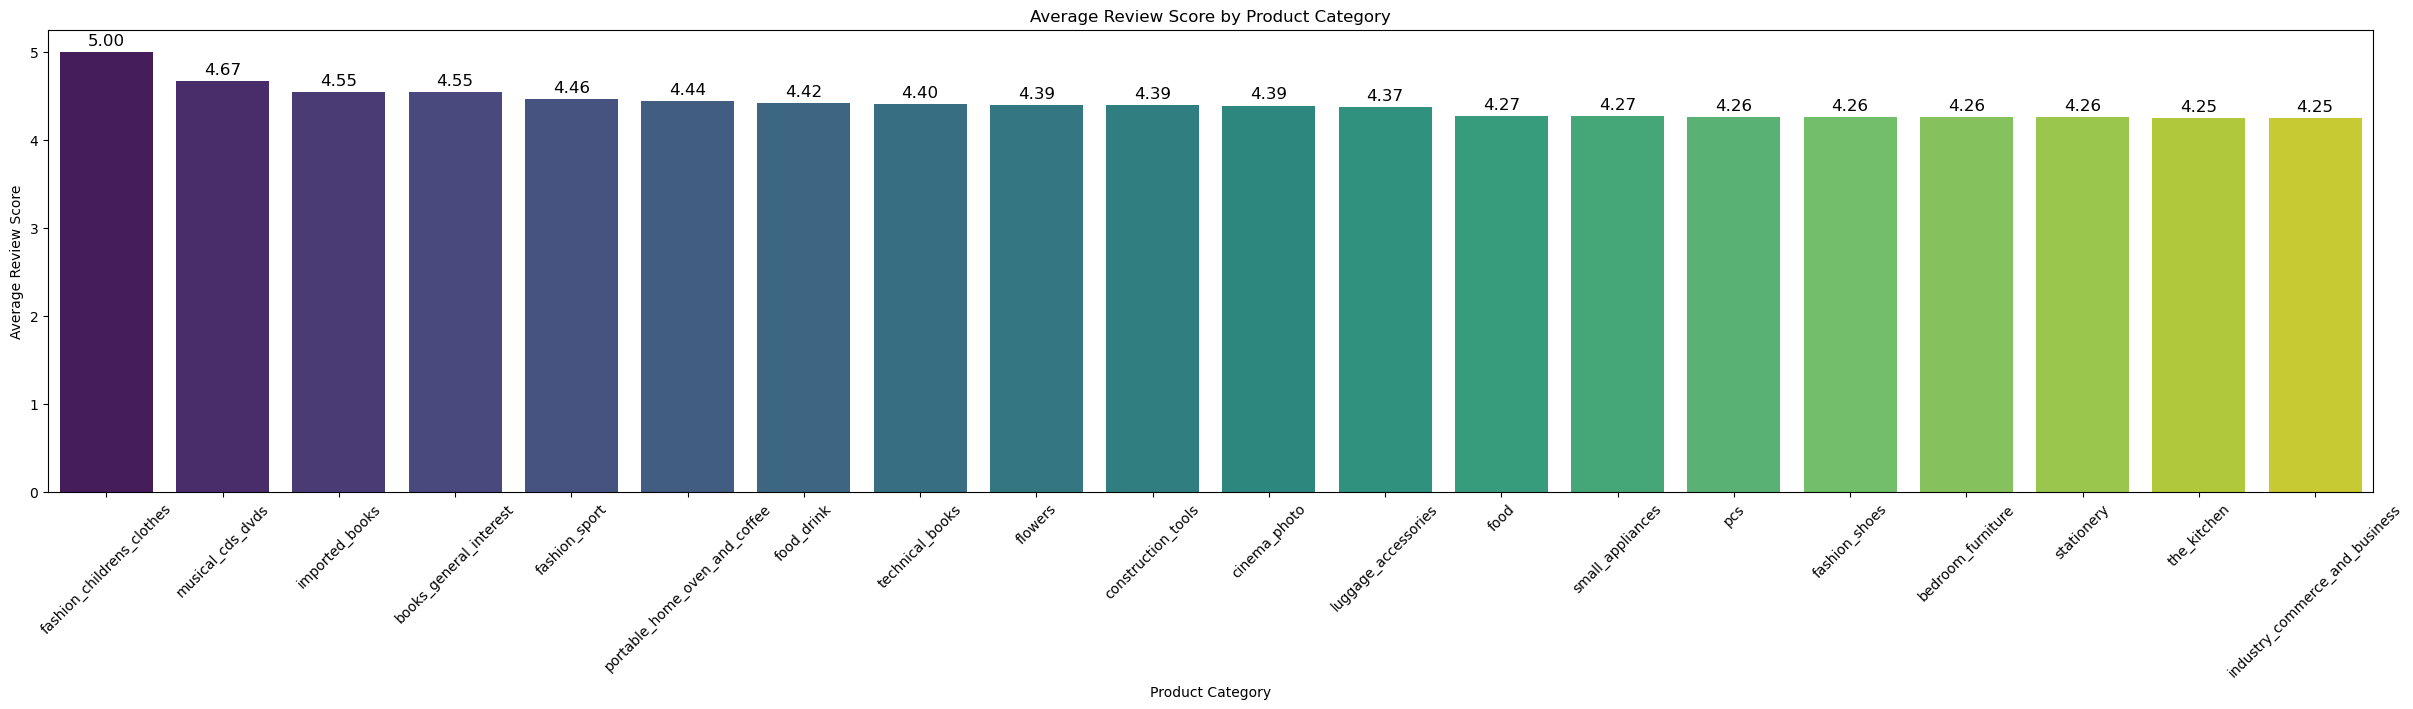

In [124]:
# 제품 카테고리별로 리뷰 점수의 평균 계산
category_mean_scores = review_df.groupby('Product_category_name')['Review_score'].mean().reset_index()

# 내림차순으로 정렬
category_mean_scores = category_mean_scores.sort_values(by='Review_score', ascending=False)
category_mean_scores = category_mean_scores.head(20)

# 막대 그래프 그리기
plt.figure(figsize=(30, 6))
bar_plot = sns.barplot(x='Product_category_name', y='Review_score', data=category_mean_scores, palette='viridis')

# 막대 위에 평균 리뷰 점수 표시
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(), '.2f'),
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='center',
                      size=12, xytext=(0, 8),
                      textcoords='offset points')

plt.title('Average Review Score by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.show()

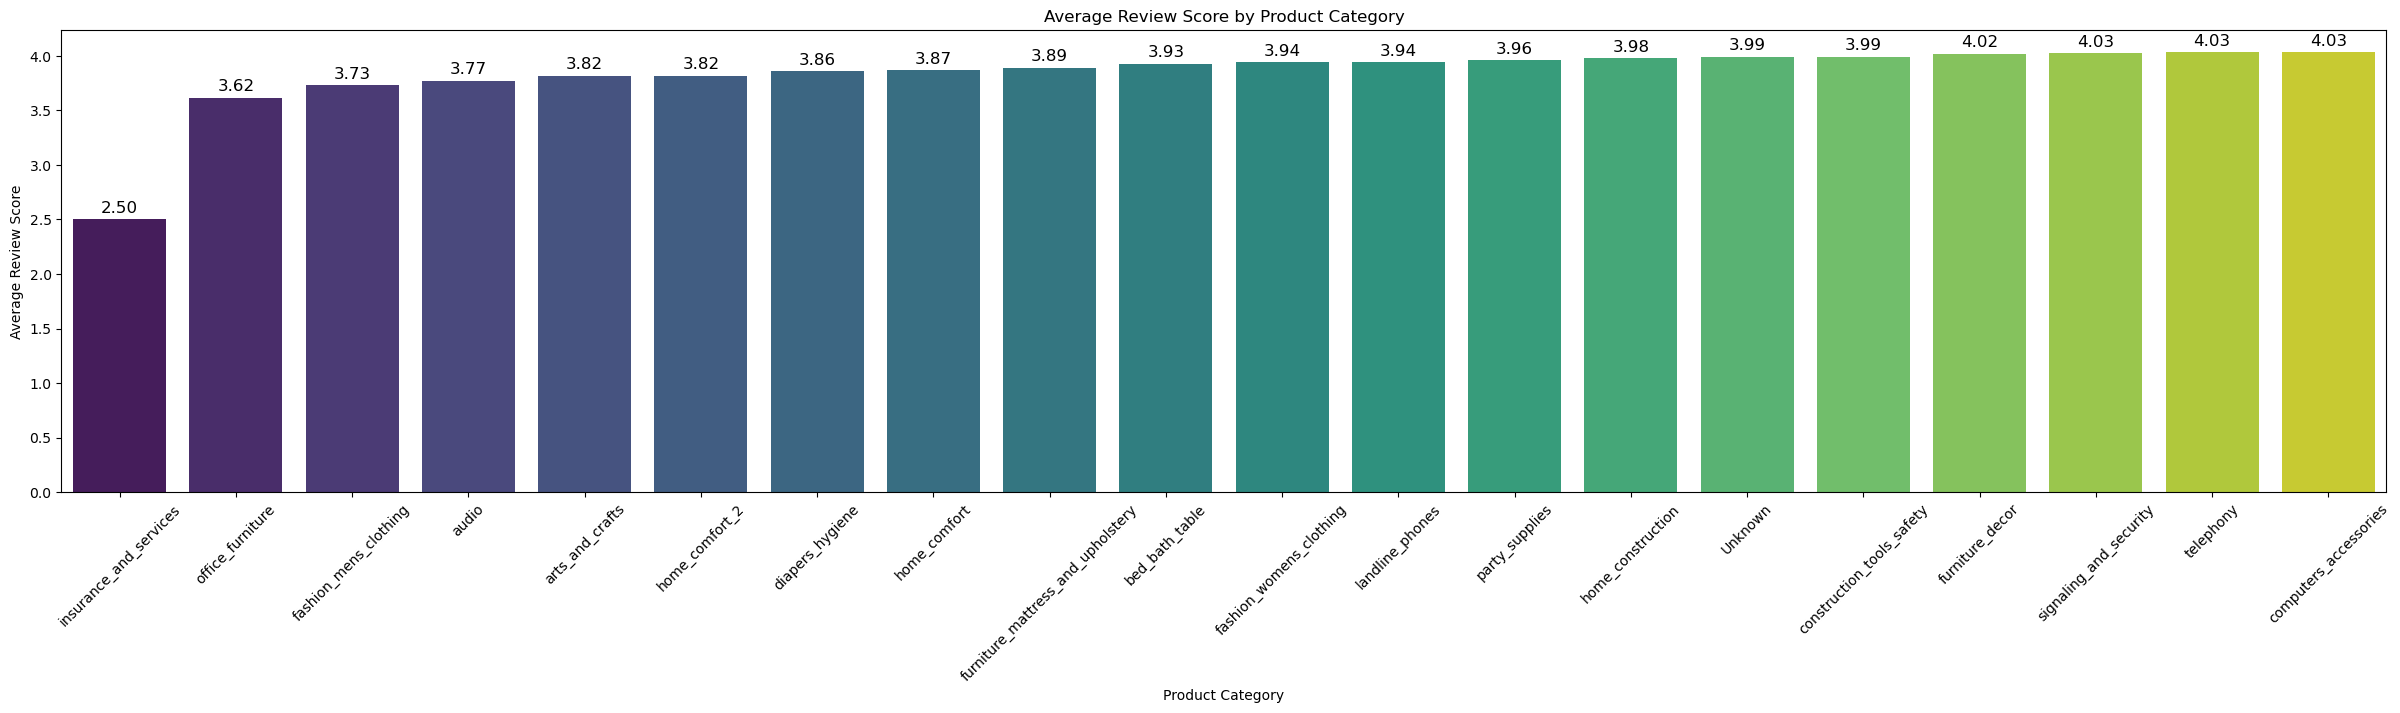

In [125]:
# 제품 카테고리별로 리뷰 점수의 평균 계산
category_mean_scores = review_df.groupby('Product_category_name')['Review_score'].mean().reset_index()

# 내림차순으로 정렬
category_mean_scores = category_mean_scores.sort_values(by='Review_score')
category_mean_scores = category_mean_scores.head(20)

# 막대 그래프 그리기
plt.figure(figsize=(30, 6))
bar_plot = sns.barplot(x='Product_category_name', y='Review_score', data=category_mean_scores, palette='viridis')

# 막대 위에 평균 리뷰 점수 표시
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(), '.2f'),
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='center',
                      size=12, xytext=(0, 8),
                      textcoords='offset points')

plt.title('Average Review Score by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.show()

In [126]:
# 교차 분할표 생성
contingency_table = pd.crosstab(review_df['Customer_state'], review_df['Review_score'])
print("Contingency Table:")
print(contingency_table)

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("\nChi2 Stat:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")

Contingency Table:
Review_score       1     2     3     4      5
Customer_state                               
AC                 6     7     7    15     39
AL                58    24    28    82    181
AM                 9     9     6    25     80
AP                 3     2     5    19     32
BA               436   121   323   682   1509
CE               183    49   125   242    625
DF               215    65   158   409   1111
ES               231    54   172   400   1023
GO               195    71   181   401   1039
MA               114    32    68   147    321
MG              1066   315   924  2130   6422
MS                67    24    47   126    400
MT                93    31    73   178    475
PA               139    32    89   188    439
PB                56    19    44    89    268
PE               180    49   120   296    837
PI                60    14    39    95    234
PR               416   152   358   934   2796
RJ              1855   454   993  1992   6444
RN             

In [127]:
# ANOVA 수행
model = ols('delivered_date ~ Review_score', data=review_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA Table:")
print(anova_table)

ANOVA Table:
                    sum_sq       df             F  PR(>F)
Review_score  8.700052e+05      1.0  10613.543872     0.0
Residual      7.476841e+06  91213.0           NaN     NaN


### 카테고리

In [128]:
orders_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91292 entries, 0 to 91291
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   Order_id                       91292 non-null  object         
 1   Customer_id                    91292 non-null  object         
 2   Order_status                   91292 non-null  object         
 3   Order_purchase_timestamp       91292 non-null  datetime64[ns] 
 4   Order_delivered_carrier_date   91292 non-null  datetime64[ns] 
 5   Order_delivered_customer_date  91292 non-null  datetime64[ns] 
 6   Order_estimated_delivery_date  91292 non-null  datetime64[ns] 
 7   delivered_date                 91292 non-null  timedelta64[ns]
 8   date_diff                      91292 non-null  timedelta64[ns]
 9   is_late                        91292 non-null  bool           
 10  InvoiceYearMonth               91292 non-null  object         
 11  Cu

In [129]:
orders_customers.groupby('Product_category_name')['Order_id'].count()

Product_category_name
Unknown                       1367
agro_industry_and_commerce     156
air_conditioning               223
arts                           172
arts_and_crafts                 11
                              ... 
technical_books                224
telephony                     3840
the_kitchen                     13
toys                          3690
watches_gifts                 5092
Name: Order_id, Length: 72, dtype: int64

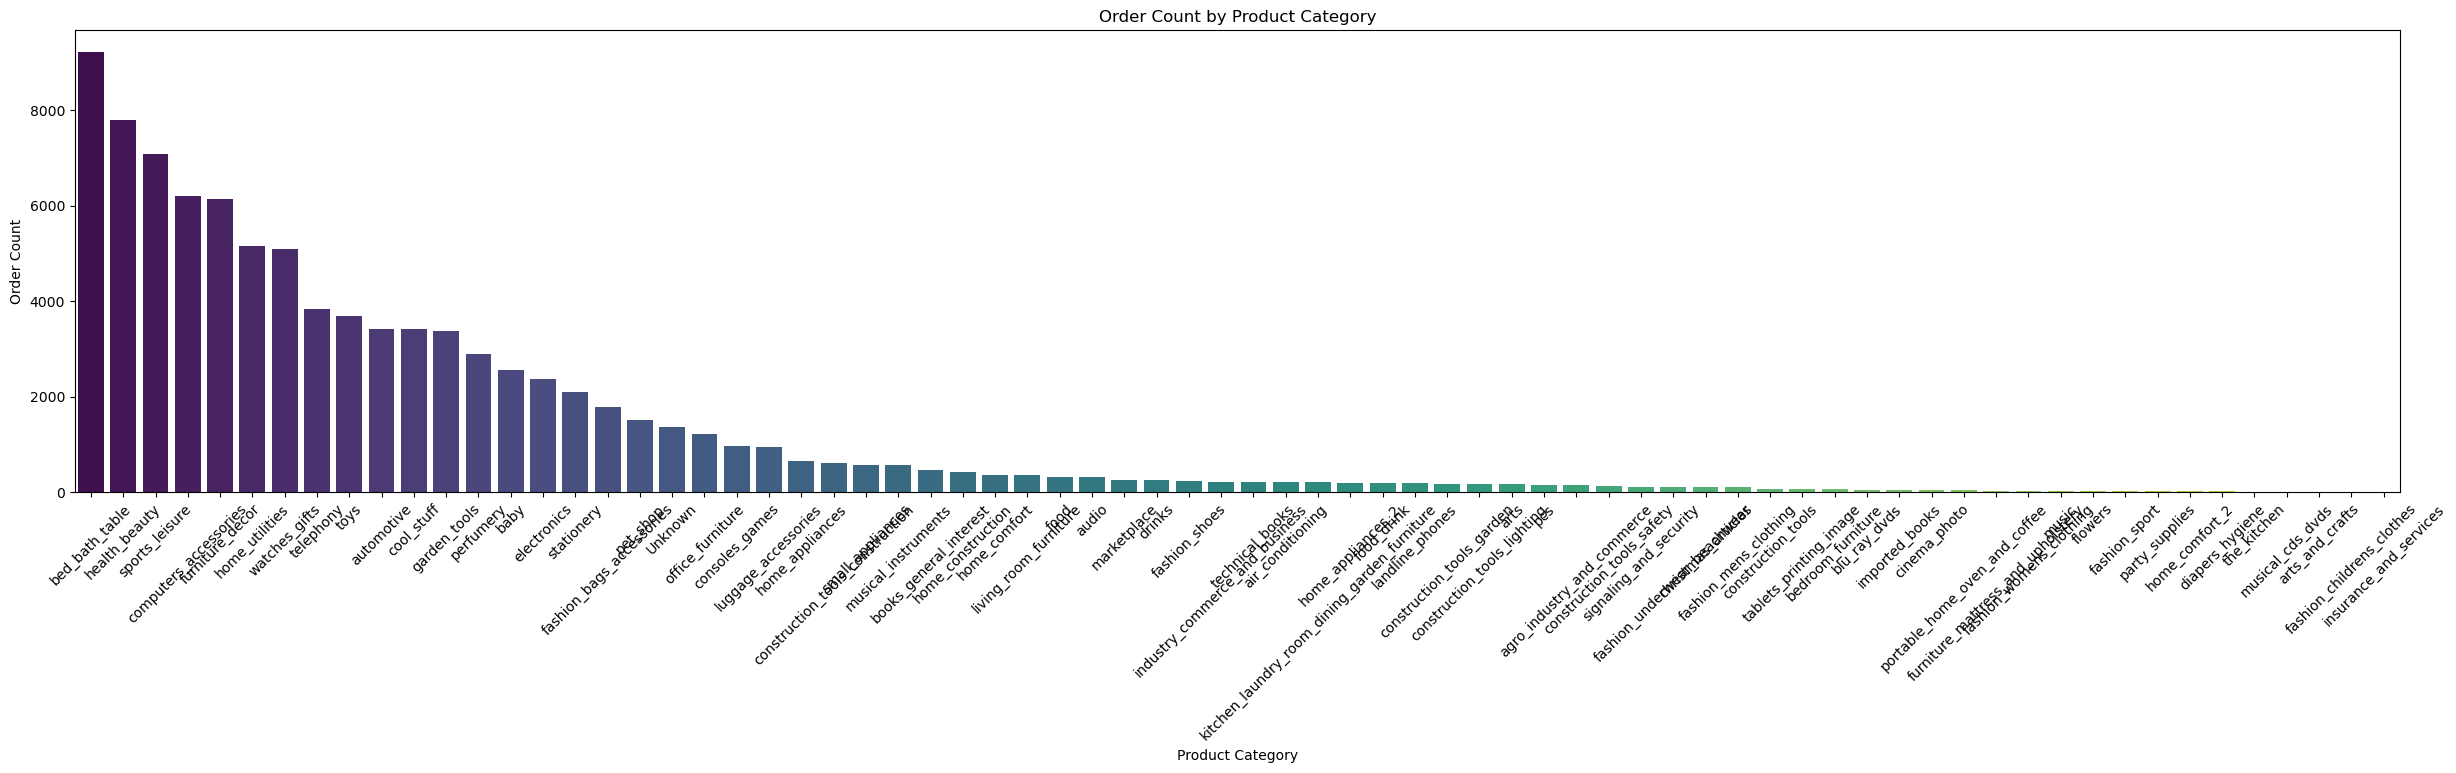

In [130]:
# 제품 카테고리별로 주문 건수 계산
category_order_counts = orders_customers.groupby('Product_category_name')['Order_id'].count().reset_index()

# 내림차순으로 정렬
category_order_counts = category_order_counts.sort_values(by='Order_id', ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(30, 6))
bar_plot = sns.barplot(x='Product_category_name', y='Order_id', data=category_order_counts, palette='viridis')

plt.title('Order Count by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()


In [131]:
delivery_df = orders_customers.copy()

In [132]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91292 entries, 0 to 91291
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   Order_id                       91292 non-null  object         
 1   Customer_id                    91292 non-null  object         
 2   Order_status                   91292 non-null  object         
 3   Order_purchase_timestamp       91292 non-null  datetime64[ns] 
 4   Order_delivered_carrier_date   91292 non-null  datetime64[ns] 
 5   Order_delivered_customer_date  91292 non-null  datetime64[ns] 
 6   Order_estimated_delivery_date  91292 non-null  datetime64[ns] 
 7   delivered_date                 91292 non-null  timedelta64[ns]
 8   date_diff                      91292 non-null  timedelta64[ns]
 9   is_late                        91292 non-null  bool           
 10  InvoiceYearMonth               91292 non-null  object         
 11  Cu

In [133]:
delivery_df = pd.merge(delivery_df, seller, on = "Seller_id",how='left')

In [134]:
delivery_df = pd.merge(delivery_df, product[['Product_id','Product_weight_g','Product_length_cm', 'Product_height_cm', 'Product_width_cm']], on = "Product_id",how='left')

In [135]:
max_order_items = order_items.loc[order_items.groupby('Order_id')['Order_item_id'].idxmax()].reset_index(drop=True)

In [136]:
delivery_df = pd.merge(delivery_df, max_order_items[['Order_id','Order_item_id']], on = "Order_id",how='left')

In [137]:
delivery_df.isnull().sum()

Order_id                         0
Customer_id                      0
Order_status                     0
Order_purchase_timestamp         0
Order_delivered_carrier_date     0
Order_delivered_customer_date    0
Order_estimated_delivery_date    0
delivered_date                   0
date_diff                        0
is_late                          0
InvoiceYearMonth                 0
Customer_unique_id               0
Customer_zipcode_prefix          0
Customer_city                    0
Customer_state                   0
Product_id                       1
Seller_id                        1
Price                            1
Freight_value                    1
Product_category_name            1
date_diff_days                   0
delivered_date_days              0
carrier_diff                     0
carrier_diff_days                0
estimated_date                   0
estimated_date_days              0
Seller_zipcode_prefix            1
Seller_city                      1
Seller_state        

In [138]:
delivery_df.dropna(inplace=True)

In [139]:
delivery_df.head()

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,delivered_date,date_diff,is_late,...,estimated_date,estimated_date_days,Seller_zipcode_prefix,Seller_city,Seller_state,Product_weight_g,Product_length_cm,Product_height_cm,Product_width_cm,Order_item_id
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,8 days 10:28:40,-8 days +21:25:13,False,...,15 days 13:03:27,15,9350.0,maua,SP,500.0,19.0,8.0,13.0,1.0
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,13 days 05:00:36,-13 days +00:28:42,False,...,26 days 04:31:54,26,31842.0,belo horizonte,MG,450.0,30.0,10.0,20.0,1.0
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,2 days 20:58:23,-10 days +18:17:02,False,...,12 days 02:41:21,12,8752.0,mogi das cruzes,SP,250.0,51.0,15.0,15.0,1.0
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,16 days 13:00:50,-6 days +10:57:55,False,...,22 days 02:02:55,22,7112.0,guarulhos,SP,7150.0,65.0,10.0,65.0,1.0
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,9 days 23:45:21,-12 days +12:55:51,False,...,21 days 10:49:30,21,12940.0,atibaia,SP,50.0,16.0,16.0,17.0,1.0


In [140]:
delivery_df['Product_length_cm'] = pd.to_numeric(delivery_df['Product_length_cm'], errors='coerce')
delivery_df['Product_height_cm'] = pd.to_numeric(delivery_df['Product_height_cm'], errors='coerce')
delivery_df['Product_width_cm'] = pd.to_numeric(delivery_df['Product_width_cm'], errors='coerce')

In [141]:
delivery_df['Product_volume_cm3'] = delivery_df['Product_length_cm'] * delivery_df['Product_height_cm'] * delivery_df['Product_width_cm']

In [142]:
delivery_df['purchase_dayofweek'] = delivery_df['Order_purchase_timestamp'].dt.day_name()

In [143]:
delivery_df['purchase_isweekend'] = delivery_df['Order_purchase_timestamp'].dt.dayofweek >= 5

In [144]:
delivery_df['carrier_isweekend'] = delivery_df['Order_delivered_carrier_date'].dt.dayofweek >= 5

In [145]:
delivery_df['carrier_dayofweek'] = delivery_df['Order_delivered_carrier_date'].dt.day_name()

In [146]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91291 entries, 0 to 91291
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   Order_id                       91291 non-null  object         
 1   Customer_id                    91291 non-null  object         
 2   Order_status                   91291 non-null  object         
 3   Order_purchase_timestamp       91291 non-null  datetime64[ns] 
 4   Order_delivered_carrier_date   91291 non-null  datetime64[ns] 
 5   Order_delivered_customer_date  91291 non-null  datetime64[ns] 
 6   Order_estimated_delivery_date  91291 non-null  datetime64[ns] 
 7   delivered_date                 91291 non-null  timedelta64[ns]
 8   date_diff                      91291 non-null  timedelta64[ns]
 9   is_late                        91291 non-null  bool           
 10  InvoiceYearMonth               91291 non-null  object         
 11  Custome

In [147]:
delivery_df['purchase_carrier_diff'] = delivery_df['Order_delivered_carrier_date'] - delivery_df['Order_purchase_timestamp']

In [148]:
delivery_df['purchase_estimated_diff'] = delivery_df['Order_estimated_delivery_date'] - delivery_df['Order_purchase_timestamp']

In [149]:
delivery_df.isnull().sum()

Order_id                          0
Customer_id                       0
Order_status                      0
Order_purchase_timestamp          0
Order_delivered_carrier_date      0
Order_delivered_customer_date     0
Order_estimated_delivery_date     0
delivered_date                    0
date_diff                         0
is_late                           0
InvoiceYearMonth                  0
Customer_unique_id                0
Customer_zipcode_prefix           0
Customer_city                     0
Customer_state                    0
Product_id                        0
Seller_id                         0
Price                             0
Freight_value                     0
Product_category_name             0
date_diff_days                    0
delivered_date_days               0
carrier_diff                      0
carrier_diff_days                 0
estimated_date                    0
estimated_date_days               0
Seller_zipcode_prefix             0
Seller_city                 

In [150]:
dellivery_clf_df = delivery_df[['Customer_city','Customer_state','Price','Freight_value','Product_category_name'  ,'Seller_state' ,'Order_item_id' ,'Product_weight_g' ,'Product_volume_cm3','purchase_dayofweek','purchase_isweekend','carrier_isweekend','carrier_dayofweek','purchase_carrier_diff','purchase_estimated_diff','is_late']]

In [151]:
dellivery_clf_df

,Customer_city,Customer_state,Price,Freight_value,Product_category_name,Seller_state,Order_item_id,Product_weight_g,Product_volume_cm3,purchase_dayofweek,purchase_isweekend,carrier_isweekend,carrier_dayofweek,purchase_carrier_diff,purchase_estimated_diff,is_late
0,sao paulo,SP,29.99,8.72,home_utilities,SP,1.0,500.0,1976.0,Tuesday,False,False,Thursday,2 days 08:58:27,15 days 13:03:27,False
1,sao goncalo do amarante,RN,45.00,27.20,pet_shop,MG,1.0,450.0,6000.0,Sunday,True,False,Thursday,3 days 18:11:53,26 days 04:31:54,False
2,santo andre,SP,19.90,8.72,stationery,SP,1.0,250.0,11475.0,Wednesday,False,False,Thursday,0 days 22:27:55,12 days 02:41:21,False
3,congonhinhas,PR,147.90,27.36,automotive,SP,1.0,7150.0,42250.0,Monday,False,False,Wednesday,1 days 17:00:59,22 days 02:02:55,False
4,nilopolis,RJ,59.99,15.17,automotive,SP,1.0,50.0,4352.0,Wednesday,False,False,Tuesday,5 days 20:57:16,21 days 10:49:30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91287,sao jose dos campos,SP,72.00,13.08,health_beauty,SP,1.0,1175.0,5148.0,Friday,False,True,Saturday,1 days 01:23:58,18 days 14:05:55,False
91288,praia grande,SP,174.90,20.10,baby,SP,1.0,4950.0,16000.0,Wednesday,False,False,Thursday,1 days 10:23:44,23 days 11:01:02,False
91289,nova vicosa,BA,205.99,65.02,home_appliances_2,SP,1.0,13300.0,63360.0,Monday,False,False,Tuesday,1 days 06:05:43,30 days 09:13:17,False
91290,japuiba,RJ,359.98,81.18,computers_accessories,MG,2.0,6550.0,8000.0,Tuesday,False,True,Saturday,3 days 18:06:36,37 days 02:31:33,False


In [152]:
dellivery_clf_df['purchase_carrier_diff'] = dellivery_clf_df['purchase_carrier_diff'].dt.days
dellivery_clf_df['purchase_estimated_diff'] = dellivery_clf_df['purchase_estimated_diff'].dt.days

In [153]:
dellivery_clf_df['Product_weight_g'] = pd.to_numeric(dellivery_clf_df['Product_weight_g'], errors='coerce')

In [154]:
weight_mean = dellivery_clf_df['Product_weight_g'].mean()
volume_mean = dellivery_clf_df['Product_volume_cm3'].mean()

In [155]:
dellivery_clf_df['Product_weight_g'].fillna(weight_mean, inplace=True)
dellivery_clf_df['Product_volume_cm3'].fillna(volume_mean, inplace=True)

In [156]:
# TARGET 값 분리
target = dellivery_clf_df['is_late']
dellivery_clf_df.drop(['is_late'],axis=1, inplace=True)

In [157]:
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(dellivery_clf_df, target, test_size=0.2, random_state=1004)

In [158]:
numeric_df = dellivery_clf_df.select_dtypes(include=['int64', 'float64'])
numeric_col = numeric_df.columns.to_list()

X_train[numeric_col] = np.log1p(X_train[numeric_col])
X_test[numeric_col] = np.log1p(X_test[numeric_col])

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train[numeric_col] = ss.fit_transform(X_train[numeric_col])
X_test[numeric_col] = ss.transform(X_test[numeric_col])

In [159]:
categoric_df = dellivery_clf_df.select_dtypes(include=['object'])
categoric_col = categoric_df.columns.to_list()

cat_train = X_train[categoric_col]
cat_test = X_test[categoric_col]

from sklearn.preprocessing import LabelEncoder
# 각 열에 대해 레이블 인코딩 수행
for col in categoric_col:
    le = LabelEncoder()
    le.fit(cat_train[col])
    cat_train[col] = le.transform(cat_train[col])

    # train 데이터에는 있는데 test 데이터에는 없는 범주 처리
    for case in cat_test[col].unique():
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)

    cat_test[col] = le.transform(cat_test[col])

numeric_train = X_train.select_dtypes(include=['int64', 'float64'])
numeric_test = X_test.select_dtypes(include=['int64', 'float64'])

final_train = pd.concat([numeric_train, cat_train],axis=1)
final_test = pd.concat([numeric_test, cat_test],axis=1)

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=1004)

# 모델 훈련
rf_model.fit(final_train, y_train)

# 훈련된 모델을 사용하여 예측
y_pred_rf = rf_model.predict(final_test)


In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 성능 평가
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.928857002026398
Precision: 0.7839195979899497
Recall: 0.11048158640226628
F1 Score: 0.19366852886405958
Confusion Matrix:
 [[16804    43]
 [ 1256   156]]


In [162]:
X_train

,Customer_city,Customer_state,Price,Freight_value,Product_category_name,Seller_state,Order_item_id,Product_weight_g,Product_volume_cm3,purchase_dayofweek,purchase_isweekend,carrier_isweekend,carrier_dayofweek,purchase_carrier_diff,purchase_estimated_diff
2792,rio de janeiro,RJ,0.852072,-0.020913,computers_accessories,SP,-0.355929,-1.150815,0.112162,Saturday,True,False,Thursday,0.774199,1.386902
54065,goias,GO,-1.275451,0.019547,stationery,SP,-0.355929,-2.083110,-1.773873,Tuesday,False,False,Wednesday,-0.506702,0.590190
42841,aruja,SP,0.899493,-0.571494,watches_gifts,SP,-0.355929,-0.712698,-0.710568,Thursday,False,False,Tuesday,1.029070,-0.361223
64506,macae,RJ,0.646094,1.810623,bed_bath_table,SC,-0.355929,1.577214,1.056534,Friday,False,True,Saturday,-0.506702,0.379556
60662,sao goncalo,RJ,-0.175536,-0.174857,sports_leisure,SP,-0.355929,0.078303,0.096478,Thursday,False,False,Friday,-0.506702,-0.224099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79796,sanharo,PE,2.304920,4.536606,health_beauty,SP,1.712994,2.716756,2.789571,Friday,False,True,Saturday,2.309970,2.476774
42224,palhoca,SC,-0.776051,0.033449,home_appliances,SP,-0.355929,-1.568818,-1.015228,Sunday,True,False,Wednesday,0.060106,0.786770
13637,vitoria,ES,0.756560,0.626047,cool_stuff,SP,-0.355929,1.168282,0.383024,Tuesday,False,False,Friday,0.060106,0.032377
86048,natal,RN,1.546217,1.627167,consoles_games,PR,-0.355929,-0.319664,0.090114,Wednesday,False,False,Tuesday,1.029070,1.059051


In [163]:
from supervised.automl import AutoML

In [164]:
automl = AutoML(mode = "Perform",
                algorithms = ['LightGBM','Xgboost', 'CatBoost'],
                ml_task = "binary_classification", eval_metric='f1', random_state = 1004, total_time_limit=1000)

In [165]:
y_train= y_train.astype(int)

In [166]:
automl.fit(X_train, y_train)

AutoML directory: AutoML_7
The task is binary_classification with evaluation metric f1
AutoML will use algorithms: ['LightGBM', 'Xgboost', 'CatBoost']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 3 models
1_Default_LightGBM f1 0.200895 trained in 305.58 seconds (1-sample predict time 0.172 seconds)
* Step not_so_random will try to check up to 12 models
6_LightGBM f1 0.191172 trained in 185.53 seconds (1-sample predict time 0.159 seconds)
2_Xgboost f1 0.202632 trained in 174.8 seconds (1-sample predict time 0.19 seconds)
Skip golden_features because no parameters were generated.
Skip insert_random_feature because no parameters were generated.
Skip features_selection because no parameters were gene

AutoML(algorithms=['LightGBM', 'Xgboost', 'CatBoost'], eval_metric='f1',
       ml_task='binary_classification', mode='Perform', random_state=1004,
       total_time_limit=1000)

In [167]:
pred = automl.predict_all(X_test)

In [168]:
pred['label']

0        0
1        0
2        0
3        0
4        0
        ..
18254    0
18255    0
18256    0
18257    0
18258    0
Name: label, Length: 18259, dtype: int64

In [169]:
dellivery_clf_df[numeric_col].corr()

,Price,Freight_value,Order_item_id,Product_weight_g,Product_volume_cm3,purchase_carrier_diff,purchase_estimated_diff
Price,1.000000,0.402999,0.074721,0.333603,0.294954,0.075839,0.072356
Freight_value,0.402999,1.000000,0.292936,0.514788,0.493045,0.099738,0.249063
Order_item_id,0.074721,0.292936,1.000000,-0.009150,-0.001947,0.025283,0.022083
Product_weight_g,0.333603,0.514788,-0.009150,1.000000,0.799724,0.136640,0.071702
Product_volume_cm3,0.294954,0.493045,-0.001947,0.799724,1.000000,0.137340,0.061136
purchase_carrier_diff,0.075839,0.099738,0.025283,0.136640,0.137340,1.000000,0.202082
purchase_estimated_diff,0.072356,0.249063,0.022083,0.071702,0.061136,0.202082,1.000000


In [170]:
# 성능 평가
accuracy = accuracy_score(y_test, pred['label'])
precision = precision_score(y_test, pred['label'])
recall = recall_score(y_test, pred['label'])
f1 = f1_score(y_test, pred['label'])
conf_matrix = confusion_matrix(y_test, pred['label'])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9285283969549263
Precision: 0.8242424242424242
Recall: 0.09631728045325778
F1 Score: 0.17247939124920733
Confusion Matrix:
 [[16818    29]
 [ 1276   136]]


In [171]:
dellivery_model_df = delivery_df[['Customer_city','Customer_state','Seller_id','Price','Freight_value','Product_category_name' ,'Seller_city'  ,'Seller_state' ,'Order_item_id' ,'Product_weight_g' ,'Product_volume_cm3','purchase_dayofweek','purchase_isweekend','carrier_isweekend','carrier_dayofweek','purchase_carrier_diff','purchase_estimated_diff','delivered_date']]

In [172]:
dellivery_model_df.isnull().sum()

Customer_city               0
Customer_state              0
Seller_id                   0
Price                       0
Freight_value               0
Product_category_name       0
Seller_city                 0
Seller_state                0
Order_item_id               0
Product_weight_g            0
Product_volume_cm3         16
purchase_dayofweek          0
purchase_isweekend          0
carrier_isweekend           0
carrier_dayofweek           0
purchase_carrier_diff       0
purchase_estimated_diff     0
delivered_date              0
dtype: int64

In [173]:
dellivery_model_df['purchase_carrier_diff'] = dellivery_model_df['purchase_carrier_diff'].dt.days
dellivery_model_df['purchase_estimated_diff'] = dellivery_model_df['purchase_estimated_diff'].dt.days
dellivery_model_df['delivered_date'] = dellivery_model_df['delivered_date'].dt.days

In [174]:
dellivery_model_df['Product_weight_g'] = pd.to_numeric(dellivery_model_df['Product_weight_g'], errors='coerce')

In [175]:
dellivery_model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91291 entries, 0 to 91291
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_city            91291 non-null  object 
 1   Customer_state           91291 non-null  object 
 2   Seller_id                91291 non-null  object 
 3   Price                    91291 non-null  float64
 4   Freight_value            91291 non-null  float64
 5   Product_category_name    91291 non-null  object 
 6   Seller_city              91291 non-null  object 
 7   Seller_state             91291 non-null  object 
 8   Order_item_id            91291 non-null  float64
 9   Product_weight_g         91275 non-null  float64
 10  Product_volume_cm3       91275 non-null  float64
 11  purchase_dayofweek       91291 non-null  object 
 12  purchase_isweekend       91291 non-null  bool   
 13  carrier_isweekend        91291 non-null  bool   
 14  carrier_dayofweek        91

In [176]:
# 정규성, 데이터 분포 확인 위한 QQ_plot 시각화 함수
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    (mu, sigma) = norm.fit(data)

    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')
   # QQ_plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

In [177]:
QQ_plot(dellivery_model_df.delivered_date,'delivered_date')

In [178]:
QQ_plot(dellivery_model_df.Price,'Price')

In [179]:
QQ_plot(dellivery_model_df.Freight_value,'Freight_value')

In [180]:
QQ_plot(dellivery_model_df.Order_item_id,'Order_item_id')

In [181]:
QQ_plot(dellivery_model_df.purchase_carrier_diff,'purchase_carrier_diff')

In [182]:
QQ_plot(dellivery_model_df.purchase_estimated_diff,'purchase_estimated_diff')

In [183]:
numeric_df = dellivery_model_df.select_dtypes(include=['int64', 'float64'])

In [184]:
# Seaborn Heatmap 을 사용한 Correlation 시각화
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(),cmap='Blues')

<Axes: >

In [185]:
# 박스 플롯 그리기
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(len(numeric_df.columns), 1, i)
    sns.boxplot(x=numeric_df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()

In [186]:
dellivery_model_df = dellivery_model_df[dellivery_model_df['delivered_date'] <= 100]

In [187]:
dellivery_model_df.isnull().sum()

Customer_city               0
Customer_state              0
Seller_id                   0
Price                       0
Freight_value               0
Product_category_name       0
Seller_city                 0
Seller_state                0
Order_item_id               0
Product_weight_g           16
Product_volume_cm3         16
purchase_dayofweek          0
purchase_isweekend          0
carrier_isweekend           0
carrier_dayofweek           0
purchase_carrier_diff       0
purchase_estimated_diff     0
delivered_date              0
dtype: int64

In [188]:
weight_mean = dellivery_model_df['Product_weight_g'].mean()
volume_mean = dellivery_model_df['Product_volume_cm3'].mean()

In [189]:
dellivery_model_df['Product_weight_g'].fillna(weight_mean, inplace=True)
dellivery_model_df['Product_volume_cm3'].fillna(volume_mean, inplace=True)

In [190]:
dellivery_model_df.isnull().sum()

Customer_city              0
Customer_state             0
Seller_id                  0
Price                      0
Freight_value              0
Product_category_name      0
Seller_city                0
Seller_state               0
Order_item_id              0
Product_weight_g           0
Product_volume_cm3         0
purchase_dayofweek         0
purchase_isweekend         0
carrier_isweekend          0
carrier_dayofweek          0
purchase_carrier_diff      0
purchase_estimated_diff    0
delivered_date             0
dtype: int64

In [191]:
# TARGET 값 분리
target = dellivery_model_df['delivered_date']
dellivery_model_df.drop(['delivered_date'],axis=1, inplace=True)

In [192]:
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(dellivery_model_df, target, test_size=0.2, random_state=1004)

In [193]:
numeric_df = dellivery_model_df.select_dtypes(include=['int64', 'float64'])
numeric_col = numeric_df.columns.to_list()

In [194]:
X_train[numeric_col] = np.log1p(X_train[numeric_col])

In [195]:
X_test[numeric_col] = np.log1p(X_test[numeric_col])

In [196]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train[numeric_col] = ss.fit_transform(X_train[numeric_col])
X_test[numeric_col] = ss.transform(X_test[numeric_col])

In [197]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72984 entries, 61380 to 48164
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_city            72984 non-null  object 
 1   Customer_state           72984 non-null  object 
 2   Seller_id                72984 non-null  object 
 3   Price                    72984 non-null  float64
 4   Freight_value            72984 non-null  float64
 5   Product_category_name    72984 non-null  object 
 6   Seller_city              72984 non-null  object 
 7   Seller_state             72984 non-null  object 
 8   Order_item_id            72984 non-null  float64
 9   Product_weight_g         72984 non-null  float64
 10  Product_volume_cm3       72984 non-null  float64
 11  purchase_dayofweek       72984 non-null  object 
 12  purchase_isweekend       72984 non-null  bool   
 13  carrier_isweekend        72984 non-null  bool   
 14  carrier_dayofweek      

In [198]:
categoric_df = dellivery_model_df.select_dtypes(include=['object'])
categoric_col = categoric_df.columns.to_list()

In [199]:
categoric_col

['Customer_city',
 'Customer_state',
 'Seller_id',
 'Product_category_name',
 'Seller_city',
 'Seller_state',
 'purchase_dayofweek',
 'carrier_dayofweek']

In [200]:
cat_train = X_train[categoric_col]
cat_test = X_test[categoric_col]

In [201]:
from sklearn.preprocessing import LabelEncoder
# 각 열에 대해 레이블 인코딩 수행
for col in categoric_col:
    le = LabelEncoder()
    le.fit(cat_train[col])
    cat_train[col] = le.transform(cat_train[col])

    # train 데이터에는 있는데 test 데이터에는 없는 범주 처리
    for case in cat_test[col].unique():
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)

    cat_test[col] = le.transform(cat_test[col])

In [202]:
numeric_train = X_train.select_dtypes(include=['int64', 'float64'])
numeric_test = X_test.select_dtypes(include=['int64', 'float64'])

In [203]:
final_train = pd.concat([numeric_train, cat_train],axis=1)
final_test = pd.concat([numeric_test, cat_test],axis=1)

In [204]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=1004)

# 모델 훈련
rf_model.fit(final_train, y_train)

# 훈련된 모델을 사용하여 예측
y_pred_rf = rf_model.predict(final_test)

# 모델 평가 (예시로 평균 제곱 오차 사용)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)

Random Forest Mean Squared Error: 47.803976809864594


In [205]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return(np.sqrt(mse))

In [206]:
rmse(y_test, y_pred_rf)

6.9140420023214055

In [207]:
from catboost import CatBoostRegressor

In [208]:
from catboost import Pool

In [209]:
categorical_features = [
"Customer_city",
"Customer_state",
"Seller_id",
"Product_category_name",
"Seller_city",
"Seller_state",
"purchase_dayofweek",
"carrier_dayofweek"
]
for i in categorical_features:
    X_train[i] = X_train[i].astype('category')
    X_test[i] = X_test[i].astype('category')

train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)

In [210]:
from scipy.stats import randint, loguniform

param_grid = {
    'n_estimators': randint(100, 300),
    'depth': randint(1, 5),
    'learning_rate': loguniform(1e-3, 0.1),
    'min_child_samples': randint(10, 40),
    'grow_policy': ['SymmetricTree', 'Lossguide', 'Depthwise']
}

In [211]:
clf = CatBoostRegressor(random_state=1004, verbose=False)

In [212]:
clf.randomized_search(param_grid,train_pool,cv=5, n_iter=10)


bestTest = 12.30357269
bestIteration = 202

0:	loss: 12.3035727	best: 12.3035727 (0)	total: 12.6s	remaining: 1m 53s

bestTest = 7.710548267
bestIteration = 267

1:	loss: 7.7105483	best: 7.7105483 (1)	total: 29.7s	remaining: 1m 58s

bestTest = 6.770896191
bestIteration = 236

2:	loss: 6.7708962	best: 6.7708962 (2)	total: 40.2s	remaining: 1m 33s

bestTest = 6.891605727
bestIteration = 245

3:	loss: 6.8916057	best: 6.7708962 (2)	total: 50.1s	remaining: 1m 15s

bestTest = 10.46546527
bestIteration = 230

4:	loss: 10.4654653	best: 6.7708962 (2)	total: 58.7s	remaining: 58.7s

bestTest = 12.7528302
bestIteration = 244

5:	loss: 12.7528302	best: 6.7708962 (2)	total: 1m 8s	remaining: 45.4s


KeyboardInterrupt: 

In [ ]:
clf.fit(train_pool)

In [ ]:
test_pool = Pool(data=X_test, cat_features=categorical_features)
pred = clf.predict(test_pool)
pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return(np.sqrt(mse))

In [ ]:
# 변수 중요도 얻기
feature_importance = clf.feature_importances_

# 각 특성의 중요도 출력
for i, importance in enumerate(feature_importance):
    print(f"Feature {X_train.columns[i]} importance: {importance}")

In [ ]:
# 변수 중요도 그래프 그리기
plt.figure(figsize=(20, 6))
plt.bar(X_train.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

## 최적의 배송위치

In [213]:
best_location=customer_location[['Geolocation_lng','Geolocation_lat']]

In [214]:
best_location

,Geolocation_lng,Geolocation_lat
0,-47.396822,-20.502070
1,-46.543554,-23.726861
2,-46.656540,-23.531351
3,-46.182342,-23.497390
4,-49.114043,-26.471185
...,...,...
87950,-46.499246,-23.586135
87951,-46.766986,-23.615071
87952,-38.510418,-3.733993
87953,-51.169247,-29.949632


In [215]:
# # 컬럼별로 표준화를 실행
# scaler = StandardScaler().fit(best_location)
# best_location_scaled = scaler.transform(best_location)
# best_location_scaled=pd.DataFrame(best_location_scaled, columns=best_location.columns)

In [216]:
# best_location_scaled

In [217]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow_M = KElbowVisualizer(KMeans(init='k-means++',random_state=1004), k=10)
Elbow_M.fit(best_location)
Elbow_M.show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [218]:
kmeans = KMeans(init='k-means++',n_clusters= 5, random_state=1004)
kmeans.fit(best_location)
cluster_labels = kmeans.labels_
best_location['clusters'] = cluster_labels
centroids = kmeans.cluster_centers_

In [219]:
centroids

array([[-43.11226869, -21.31417052],
       [-47.1101218 , -23.04064395],
       [-39.39032191,  -7.86727337],
       [-51.05255742, -14.93247278],
       [-51.00148262, -27.45587486]])

In [220]:
best_location['clusters'].value_counts()

clusters
1    39216
0    21778
4    12254
2     8533
3     6174
Name: count, dtype: int64

In [221]:
# 클러스터 시각화
plt.figure(figsize=(10, 10))
sns.scatterplot(data=best_location, x='Geolocation_lng', y='Geolocation_lat', hue='clusters', palette='viridis', s=50, alpha=0.7, edgecolor='w')

# 중심점 시각화
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='X', label='Centroids')

plt.title('KMeans Clustering Results with Centroids')
plt.xlabel('Geolocation_lng')
plt.ylabel('Geolocation_lat')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [222]:
from scipy.spatial import ConvexHull

# 각 군집별로 볼록 껍질을 구하고 시각화합니다.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=best_location, x='Geolocation_lng', y='Geolocation_lat', hue='clusters', palette='viridis', s=50, alpha=0.7, edgecolor='w')

for cluster_id in range(5):
    cluster_points = best_location[best_location['clusters'] == cluster_id][['Geolocation_lng', 'Geolocation_lat']]
    hull = ConvexHull(cluster_points)
    plt.fill(cluster_points.iloc[hull.vertices, 0], cluster_points.iloc[hull.vertices, 1], alpha=0.2)

# 중심점 시각화
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='X', label='Centroids')

plt.title('KMeans Clustering Results with Convex Hulls')
plt.xlabel('Geolocation_lng')
plt.ylabel('Geolocation_lat')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [125]:
# # 중심점 설정
# map_center = [best_location['Geolocation_lat'].mean(), best_location['Geolocation_lng'].mean()]

# # 지도 생성
# m = folium.Map(location=map_center, zoom_start=5)

# # 군집별로 데이터 추출
# for cluster in best_location['clusters'].unique():
#     cluster_data = best_location[best_location['clusters'] == cluster]
    
#     # 군집별로 다른 색상의 마커 생성하여 지도에 추가
#     if cluster == 0:
#         color = 'red'
#     elif cluster == 1:
#         color = 'blue'
#     elif cluster == 2:
#         color = 'green'
#     elif cluster == 3:
#         color = 'yellow'
#     else:
#         color = 'pink'
    
#     for index, row in cluster_data.iterrows():
#         folium.CircleMarker([row['Geolocation_lat'], row['Geolocation_lng']], radius=5, color=color, fill=True, fill_color=color).add_to(m)

# # 생성된 지도를 불러와서 출력
# m

In [224]:
customer_location = pd.concat([customer_location, best_location['clusters']],axis=1)

In [225]:
customer_location.groupby('clusters')['Customer_unique_id'].count()

clusters
0    21778
1    39216
2     8533
3     6174
4    12254
Name: Customer_unique_id, dtype: int64

In [226]:
# 중심점에 해당하는 데이터 찾기
closest_points = []
for i, centroid in enumerate(centroids):
    distances = np.linalg.norm(best_location[['Geolocation_lng', 'Geolocation_lat']].values - centroid, axis=1)
    closest_index = np.argmin(distances)
    closest_points.append(closest_index)

# 결과 출력
closest_points_df = best_location.iloc[closest_points]
print(closest_points_df)

       Geolocation_lng  Geolocation_lat  clusters
3825        -43.048156       -21.356962         0
204         -47.111208       -23.030978         1
36641       -39.296429        -7.945528         2
1942        -51.080308       -14.922007         3
9804        -51.023894       -27.610873         4


In [227]:
idx = closest_points_df.index.to_list()

In [228]:
customer_location.iloc[idx]

,Customer_id,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Geolocation_lat,Geolocation_lng,state_lat,state_lng,city_lat,city_lng,clusters
3825,CUSTOMER_03831,CUSTOMER_Unique_03826,36160,guarani,MG,-21.356962,-43.048156,-19.901363,-43.993441,-21.356962,-43.048156,0
204,CUSTOMER_00204,CUSTOMER_Unique_00204,13053,campinas,SP,-23.030978,-47.111208,-23.525852,-46.677560,-22.899227,-47.064303,1
36641,CUSTOMER_36692,CUSTOMER_Unique_36162,56140,serrita,PE,-7.945528,-39.296429,-8.086550,-35.040567,-7.945528,-39.296429,2
1942,CUSTOMER_01944,CUSTOMER_Unique_01942,76710,aruana,GO,-14.922007,-51.080308,-16.666969,-49.260342,-14.922007,-51.080308,3
9804,CUSTOMER_09819,CUSTOMER_Unique_09783,89636,abdon batista,SC,-27.610873,-51.023894,-27.072618,-49.353794,-27.610873,-51.023894,4


In [229]:
customer_location

,Customer_id,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Geolocation_lat,Geolocation_lng,state_lat,state_lng,city_lat,city_lng,clusters
0,CUSTOMER_00000,CUSTOMER_Unique_00000,14409,franca,SP,-20.502070,-47.396822,-23.525852,-46.677560,-20.529028,-47.392550,1
1,CUSTOMER_00001,CUSTOMER_Unique_00001,9790,sao bernardo do campo,SP,-23.726861,-46.543554,-23.525852,-46.677560,-23.673458,-46.570193,1
2,CUSTOMER_00002,CUSTOMER_Unique_00002,1151,sao paulo,SP,-23.531351,-46.656540,-23.525852,-46.677560,-23.558486,-46.644467,1
3,CUSTOMER_00003,CUSTOMER_Unique_00003,8775,mogi das cruzes,SP,-23.497390,-46.182342,-23.525852,-46.677560,-23.540510,-46.190874,1
4,CUSTOMER_00004,CUSTOMER_Unique_00004,89254,jaragua do sul,SC,-26.471185,-49.114043,-27.072618,-49.353794,-26.486080,-49.111059,4
...,...,...,...,...,...,...,...,...,...,...,...,...
87950,CUSTOMER_88083,CUSTOMER_Unique_85234,3937,sao paulo,SP,-23.586135,-46.499246,-23.525852,-46.677560,-23.558486,-46.644467,1
87951,CUSTOMER_88084,CUSTOMER_Unique_85235,6764,taboao da serra,SP,-23.615071,-46.766986,-23.525852,-46.677560,-23.618270,-46.785256,1
87952,CUSTOMER_88085,CUSTOMER_Unique_85236,60115,fortaleza,CE,-3.733993,-38.510418,-3.842353,-38.667633,-3.761911,-38.549473,2
87953,CUSTOMER_88086,CUSTOMER_Unique_85237,92120,canoas,RS,-29.949632,-51.169247,-29.673304,-51.705644,-29.915996,-51.164267,4


In [230]:
orders_customers

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,delivered_date,date_diff,is_late,...,Seller_id,Price,Freight_value,Product_category_name,date_diff_days,delivered_date_days,carrier_diff,carrier_diff_days,estimated_date,estimated_date_days
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,8 days 10:28:40,-8 days +21:25:13,False,...,SELLER_0491,29.99,8.72,home_utilities,-8,8,2 days 08:58:27,2,15 days 13:03:27,15
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,13 days 05:00:36,-13 days +00:28:42,False,...,SELLER_2662,45.00,27.20,pet_shop,-13,13,3 days 18:11:53,3,26 days 04:31:54,26
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,2 days 20:58:23,-10 days +18:17:02,False,...,SELLER_1354,19.90,8.72,stationery,-10,2,0 days 22:27:55,0,12 days 02:41:21,12
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,16 days 13:00:50,-6 days +10:57:55,False,...,SELLER_1518,147.90,27.36,automotive,-6,16,1 days 17:00:59,1,22 days 02:02:55,22
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,9 days 23:45:21,-12 days +12:55:51,False,...,SELLER_1599,59.99,15.17,automotive,-12,9,5 days 20:57:16,5,21 days 10:49:30,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91287,ORDER_88083,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28,8 days 05:13:56,-11 days +15:08:01,False,...,SELLER_2296,72.00,13.08,health_beauty,-11,8,1 days 01:23:58,1,18 days 14:05:55,18
91288,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02,22 days 04:38:58,-2 days +17:37:56,False,...,SELLER_0031,174.90,20.10,baby,-2,22,1 days 10:23:44,1,23 days 11:01:02,23
91289,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27,24 days 20:37:34,-6 days +11:24:17,False,...,SELLER_1892,205.99,65.02,home_appliances_2,-6,24,1 days 06:05:43,1,30 days 09:13:17,30
91290,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15,17 days 02:04:27,-21 days +23:32:54,False,...,SELLER_2445,359.98,81.18,computers_accessories,-21,17,3 days 18:06:36,3,37 days 02:31:33,37


In [231]:
orders_customers = pd.merge(orders_customers, customer_location[['Customer_id','clusters']], on='Customer_id',how='left')

In [232]:
orders_customers['Product_category_name'].nunique()

72

In [233]:
abc = pd.DataFrame(orders_customers.groupby('clusters')['Product_category_name'].value_counts()).reset_index()

In [234]:
abc[abc['clusters']==0].head(10)

,clusters,Product_category_name,count
0,0,bed_bath_table,2486
1,0,health_beauty,1761
2,0,sports_leisure,1629
3,0,computers_accessories,1579
4,0,furniture_decor,1490
5,0,watches_gifts,1336
6,0,home_utilities,1239
7,0,garden_tools,989
8,0,toys,966
9,0,cool_stuff,880


In [235]:
abc[abc['clusters']==1].head(10)

,clusters,Product_category_name,count
71,1,bed_bath_table,4535
72,1,health_beauty,3565
73,1,sports_leisure,3236
74,1,furniture_decor,2763
75,1,computers_accessories,2678
76,1,home_utilities,2565
77,1,watches_gifts,2098
78,1,toys,1647
79,1,automotive,1536
80,1,telephony,1489


In [236]:
abc[abc['clusters']==2].head(10)

,clusters,Product_category_name,count
142,2,health_beauty,976
143,2,watches_gifts,684
144,2,sports_leisure,647
145,2,computers_accessories,628
146,2,telephony,585
147,2,bed_bath_table,503
148,2,furniture_decor,487
149,2,automotive,374
150,2,cool_stuff,365
151,2,garden_tools,334


In [237]:
abc[abc['clusters']==3].head(10)

,clusters,Product_category_name,count
211,3,health_beauty,595
212,3,bed_bath_table,550
213,3,sports_leisure,529
214,3,watches_gifts,403
215,3,computers_accessories,403
216,3,furniture_decor,365
217,3,telephony,354
218,3,home_utilities,298
219,3,cool_stuff,281
220,3,automotive,277


In [238]:
abc[abc['clusters']==4].head(10)

,clusters,Product_category_name,count
278,4,bed_bath_table,1142
279,4,sports_leisure,1044
280,4,furniture_decor,1033
281,4,computers_accessories,913
282,4,health_beauty,904
283,4,home_utilities,729
284,4,telephony,585
285,4,watches_gifts,571
286,4,cool_stuff,564
287,4,garden_tools,511


In [240]:
# 선 스타일 리스트
line_styles = ['-', '--', '-.', ':']
*
# 그래프 설정
plt.figure(figsize=(14, 8))

# 월별 수량
for i, (category, data) in enumerate(orders_customers.groupby('Product_category_name')):
    # Order_purchase_timestamp를 인덱스로 설정하고, 월별로 합계 계산
    monthly_data = data.set_index('Order_purchase_timestamp').resample('M')['Order_id'].count()
    plt.plot(monthly_data.index, monthly_data, label=category, linestyle=line_styles[i % len(line_styles)])

plt.title('Category Price by Month')
plt.xlabel('Month')
plt.ylabel('Price')

# 범례 위치 조정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Product_category_name")

plt.tight_layout()
plt.show()

In [241]:
# 제품 카테고리별로 가격의 총합을 계산
category_total_price = orders_customers.groupby('Product_category_name')['Price'].sum()

# 상위 10개의 카테고리 선택
top_10_categories = category_total_price.nlargest(10).index

# 상위 10개의 카테고리만 선택
top_10_data = orders_customers[orders_customers['Product_category_name'].isin(top_10_categories)]

# 선 스타일 리스트
line_styles = ['-', '--', '-.', ':']

# 그래프 설정
plt.figure(figsize=(14, 8))

# 상위 20개 카테고리에 대해 월별 수량 계산 및 그래프 그리기
for i, (category, data) in enumerate(top_10_data.groupby('Product_category_name')):
    # Order_purchase_timestamp를 인덱스로 설정하고, 월별로 합계 계산
    monthly_data = data.set_index('Order_purchase_timestamp').resample('M')['Price'].sum()
    plt.plot(monthly_data.index, monthly_data, label=category, linestyle=line_styles[i % len(line_styles)])

plt.title('Top 10 Product Categories Price by Month')
plt.xlabel('Month')
plt.ylabel('Price')

# 범례 위치 조정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Procuct_category_name")

plt.tight_layout()
plt.show()

In [242]:
# 제품 카테고리별로 가격의 총합을 계산
category_total_price = orders_customers.groupby('Product_category_name')['Order_id'].count()

# 상위 10개의 카테고리 선택
top_10_categories = category_total_price.nlargest(10).index

# 상위 10개의 카테고리만 선택
top_10_data = orders_customers[orders_customers['Product_category_name'].isin(top_10_categories)]

# 선 스타일 리스트
line_styles = ['-', '--', '-.', ':']

# 그래프 설정
plt.figure(figsize=(14, 8))

# 상위 20개 카테고리에 대해 월별 수량 계산 및 그래프 그리기
for i, (category, data) in enumerate(top_10_data.groupby('Product_category_name')):
    # Order_purchase_timestamp를 인덱스로 설정하고, 월별로 합계 계산
    monthly_data = data.set_index('Order_purchase_timestamp').resample('M')['Order_id'].count()
    plt.plot(monthly_data.index, monthly_data, label=category, linestyle=line_styles[i % len(line_styles)])

plt.title('Top 10 Product Categories Price by Month')
plt.xlabel('Month')
plt.ylabel('Price')

# 범례 위치 조정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Procuct_category_name")

plt.tight_layout()
plt.show()

In [243]:
orders_customers['pur_carrier_diff'] = orders_customers['Order_delivered_carrier_date'] - orders_customers['Order_purchase_timestamp']

In [244]:
orders_customers['carrier_deliv_diff'] = orders_customers['Order_delivered_customer_date'] - orders_customers['Order_delivered_carrier_date']

In [245]:
orders_customers['pur_carrier_diff'] = orders_customers['pur_carrier_diff'].dt.days

In [246]:
orders_customers[['pur_carrier_diff','carrier_deliv_diff']].corr()

,pur_carrier_diff,carrier_deliv_diff
pur_carrier_diff,1.000000,0.035463
carrier_deliv_diff,0.035463,1.000000


In [ ]:
# orders_customers.to_csv('order_customer.csv',index=False)

In [ ]:
# customer_location.to_csv('customer_location.csv',index=False)

In [11]:
delivery_location = pd.merge(orders_customers,customer_location,on='Customer_id')

In [13]:
delivery_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91292 entries, 0 to 91291
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_id                    91292 non-null  object 
 1   Customer_unique_id_x           91292 non-null  object 
 2   Customer_zipcode_prefix_x      91292 non-null  int64  
 3   Customer_city_x                91292 non-null  object 
 4   Customer_state_x               91292 non-null  object 
 5   Geolocation_lat                91292 non-null  float64
 6   Geolocation_lng                91292 non-null  float64
 7   state_lat                      91292 non-null  float64
 8   state_lng                      91292 non-null  float64
 9   city_lat                       91292 non-null  float64
 10  city_lng                       91292 non-null  float64
 11  clusters_x                     91292 non-null  int64  
 12  Order_id                       91292 non-null 

In [16]:
delivery_location = delivery_location[['Customer_id','Order_id','Geolocation_lat','Geolocation_lng','Order_purchase_timestamp','Order_delivered_carrier_date','Order_estimated_delivery_date','Order_delivered_customer_date']]

In [17]:
delivery_location.to_csv('delivery_location.csv',index=False)